#### Instruction (Read this)
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- But remove <b>unnecessary</b> cells to ensure the notebook is readable.
- Marks will be <b>deducted</b> if the notebook is cluttered or difficult to follow due to excess or irrelevant content.
- <b>Briefly</b> describe the steps in the "Description:" field.
- <b>Do not</b> submit the dataset. 
- The submitted jupyter notebook will be executed using the uploaded dataset in eLearn.

#### Group Information

Group No: Seismic 6

- Member 1: Lim Wen Hao
- Member 2: Goey Chew Hong
- Member 3: Lim Cong Sheng
- Member 4: Tan Jun Cheng


#### Import libraries

In [1]:
%config Completer.use_jedi=False # comment if not needed

# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries for machine learning
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier # for KNN
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text # for decision tree

# Import necessary libraries for Feature Selection and Sampling
from imblearn.over_sampling import SMOTE # for oversampling
from collections import Counter # for counting

%matplotlib inline

#### Load the dataset

From the dataset README documentation, 

**Attribute information:**
1. `seismic`: result of shift seismic hazard assessment in the mine working obtained by the seismic method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state);
2. `seismoacoustic`: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method;
3. `shift`: information about type of a shift (W - coal-getting, N -preparation shift);
4. `genergy`: seismic energy recorded within previous shift by the most active geophone (GMax) out of geophones monitoring the longwall;
5. `gpuls`: a number of pulses recorded within previous shift by GMax;
6. `gdenergy`: a deviation of energy recorded within previous shift by GMax from average energy recorded during eight previous shifts;
7. `gdpuls`: a deviation of a number of pulses recorded within previous shift by GMax from average number of pulses recorded during eight previous shifts;
8. `ghazard`: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method based on registration coming form GMax only;
9. `nbumps`: the number of seismic bumps recorded within previous shift;
10. `nbumps2`: the number of seismic bumps (in energy range [10^2,10^3)) registered within previous shift;
11. `nbumps3`: the number of seismic bumps (in energy range [10^3,10^4)) registered within previous shift;
12. `nbumps4`: the number of seismic bumps (in energy range [10^4,10^5)) registered within previous shift;
13. `nbumps5`: the number of seismic bumps (in energy range [10^5,10^6)) registered within the last shift;
14. `nbumps6`: the number of seismic bumps (in energy range [10^6,10^7)) registered within previous shift;
15. `nbumps7`: the number of seismic bumps (in energy range [10^7,10^8)) registered within previous shift;
16. `nbumps89`: the number of seismic bumps (in energy range [10^8,10^10)) registered within previous shift;
17. `energy`: total energy of seismic bumps registered within previous shift;
18. `maxenergy`: the maximum energy of the seismic bumps registered within previous shift;
19. `class`: the decision attribute - "1" means that high energy seismic bump occurred in the next shift 

In [2]:
df = pd.read_csv("seismic-bumps.csv")
df.sample(10)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
1788,b,a,W,18470,505,-38,2,a,0,0,0,0,0,0,0,0,0,0,0
469,a,b,N,8190,64,-11,36,a,0,0,0,0,0,0,0,0,0,0,0
541,a,a,N,2020,18,-76,-76,a,1,1,0,0,0,0,0,0,400,400,0
1592,a,b,N,9870,360,5,14,a,0,0,0,0,0,0,0,0,0,0,0
1216,b,a,W,25400,810,19,31,a,0,0,0,0,0,0,0,0,0,0,0
494,b,a,W,87140,680,94,83,a,4,2,1,1,0,0,0,0,27100,20000,0
2319,b,a,W,76200,766,166,71,a,0,0,0,0,0,0,0,0,0,0,0
1794,b,a,W,14390,455,-50,-8,a,1,0,1,0,0,0,0,0,1000,1000,0
927,a,b,N,20250,45,13,-10,a,0,0,0,0,0,0,0,0,0,0,0
426,b,b,W,59300,690,53,70,a,6,1,5,0,0,0,0,0,25700,8000,0


From the sample we got, `class` column consists only 0 and 1 which is the target label column.

In [3]:
# Summarize the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpuls           2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   ghazard         2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9   nbumps2         2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

In [4]:
# Check for missing values
df.isnull().sum()

seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

From the summary we get,
1. No null values found in all columns
2. There are 19 columns and 2584 records found in the dataset.

In [5]:
# Set the target variable
label = "class"
df[label].value_counts()

class
0    2414
1     170
Name: count, dtype: int64

In [6]:
# Categorize the column based on data types
categorical_df = df.select_dtypes(include='object')
categorical_df.head()

,seismic,seismoacoustic,shift,ghazard
0,a,a,N,a
1,a,a,N,a
2,a,a,N,a
3,a,a,N,a
4,a,a,N,a


In [7]:
# Categorize the column based on data types
numerical_df = df.select_dtypes(include='int64')
numerical_df.head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,0,0,0,2000,2000,0
2,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,0,0,0,3000,3000,0
4,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0


From the value counts, 2414 records found with `class` = 0, and 170 records of `class` = 1.

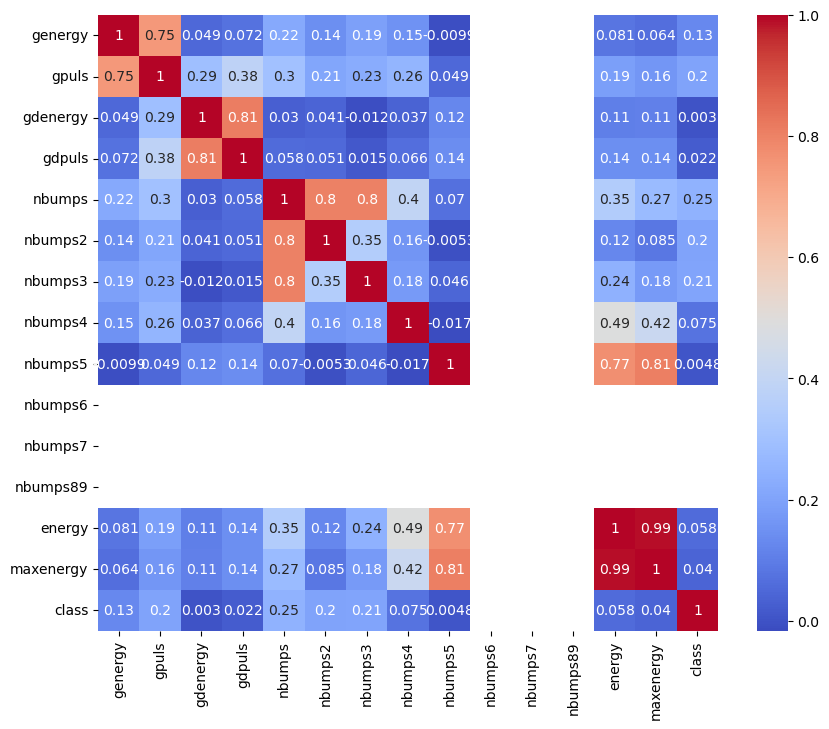

In [8]:
# Plot the correlation matrix for numerical features
corr = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

From the correlation matrix, among the features that highly correlated with each others include:
- `energy` and `maxenergy` (0.99)
- `gdpuls` and `gdenergy` (0.81)
- `nbumps5` and `maxenergy` (0.81)
- `nbumps` and `nbumps2` (0.8)
- `nbumps` and `nbumps3` (0.8)
- `nbumps5` and `energy` (0.77)
- `gpuls` and `genergy` (0.75)

Features that do not show any correlation with other classes:
- `nbumps6`
- `nbumps7`
- `nbumps89`

These features can be dropped in the subsequent steps as they do not need to be involved in the model training.

**None of the features** show direct correlation with the target column, `class`.

`class` column can be dropped from numerical DataFrame `numerical_df` as it is a target column

In [9]:
# Drop the features that are not needed for the analysis
df.drop(['nbumps89', 'nbumps7', 'nbumps6'], axis=1, inplace=True)
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0


In [10]:
# Drop the features that are not needed for the analysis and the target variable
numerical_df.drop(['nbumps89', 'nbumps7', 'nbumps6', 'class'], axis=1, inplace=True)
numerical_df.head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,15180,48,-72,-72,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,2000,2000
2,8050,30,-81,-78,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,3000,3000
4,12640,57,-63,-52,0,0,0,0,0,0,0


In [11]:
# Summarize the numerical features
numerical_df.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000


In [12]:
# Categorize the continuous features
continuous_df = numerical_df[["genergy", "gpuls", "gdenergy", "gdpuls", "energy", "maxenergy"]]
continuous_df.head()

,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy
0,15180,48,-72,-72,0,0
1,14720,33,-70,-79,2000,2000
2,8050,30,-81,-78,0,0
3,28820,171,-23,40,3000,3000
4,12640,57,-63,-52,0,0


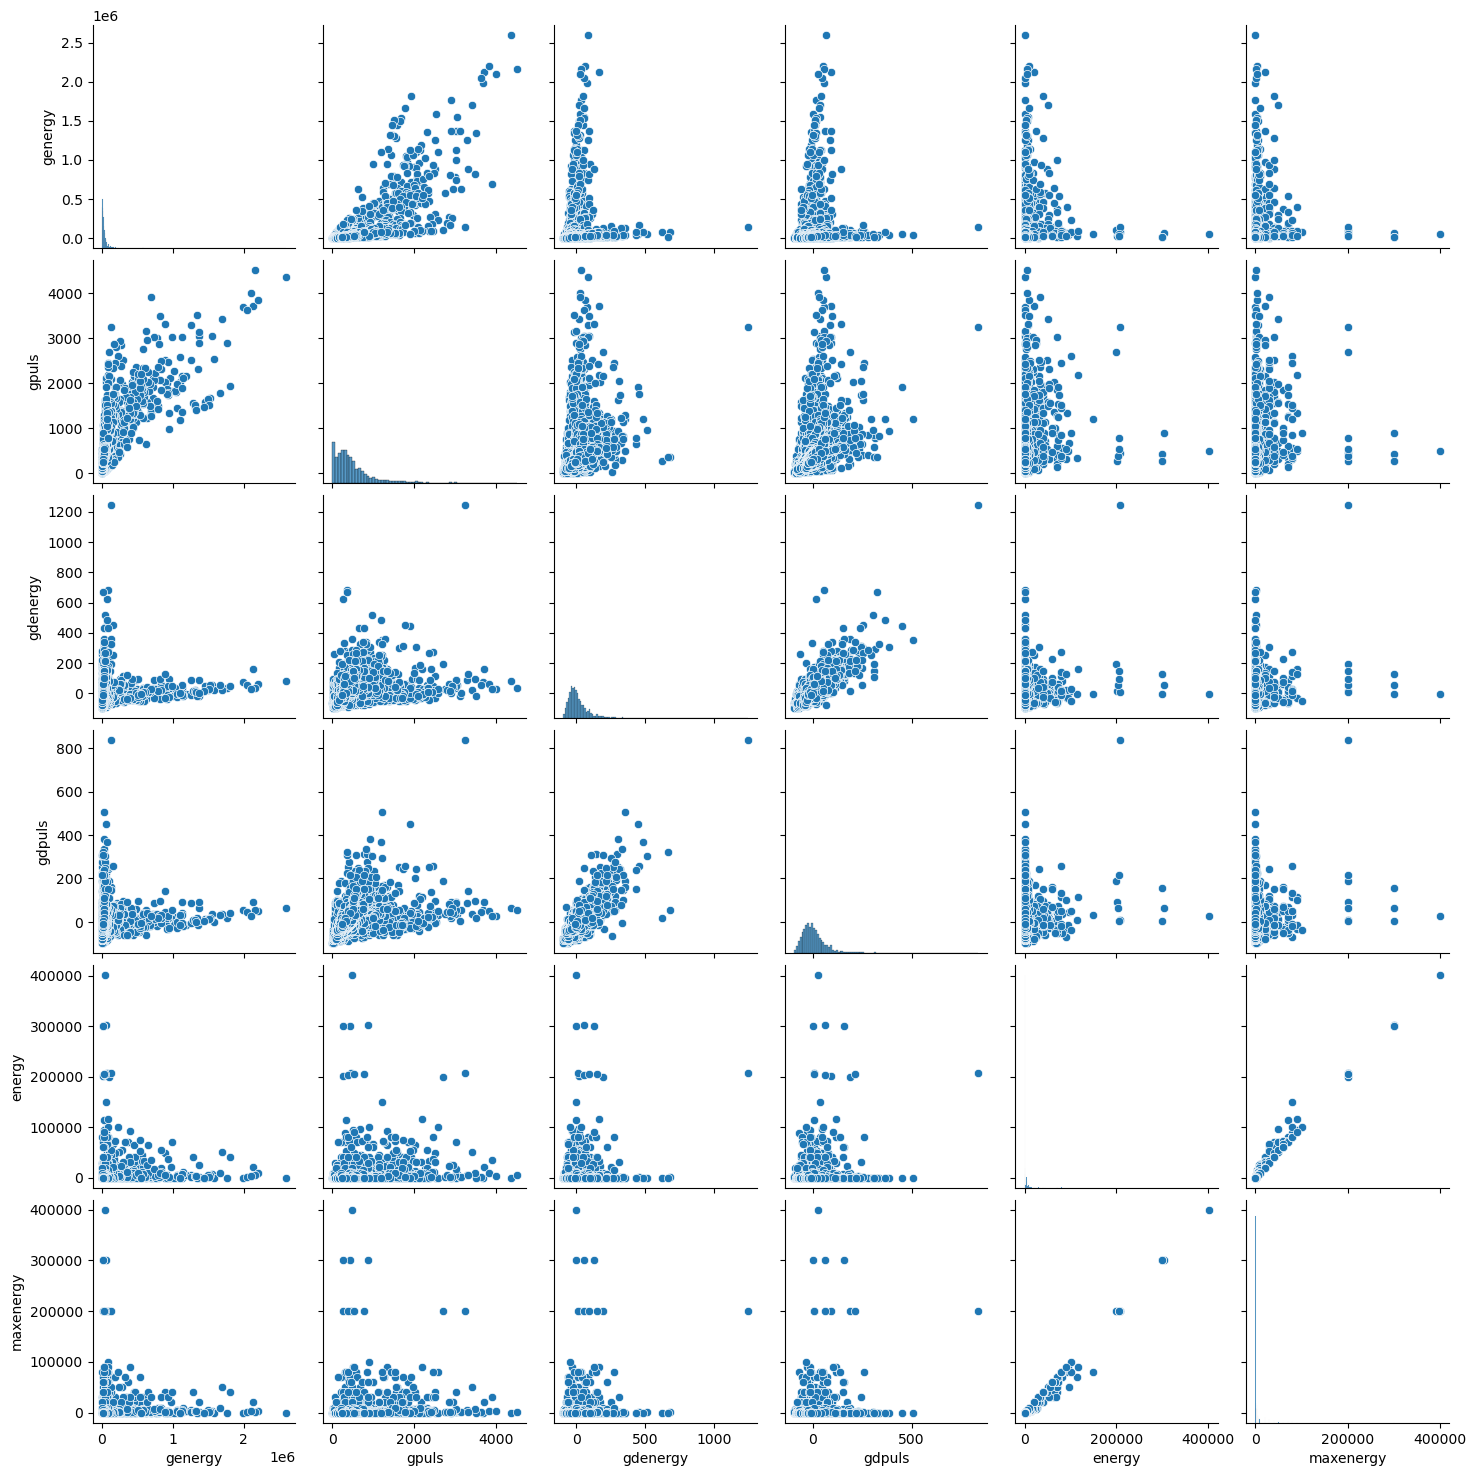

In [13]:
# Plot the distribution of continuous features
sns.pairplot(continuous_df, size = 2.5)
plt.show()

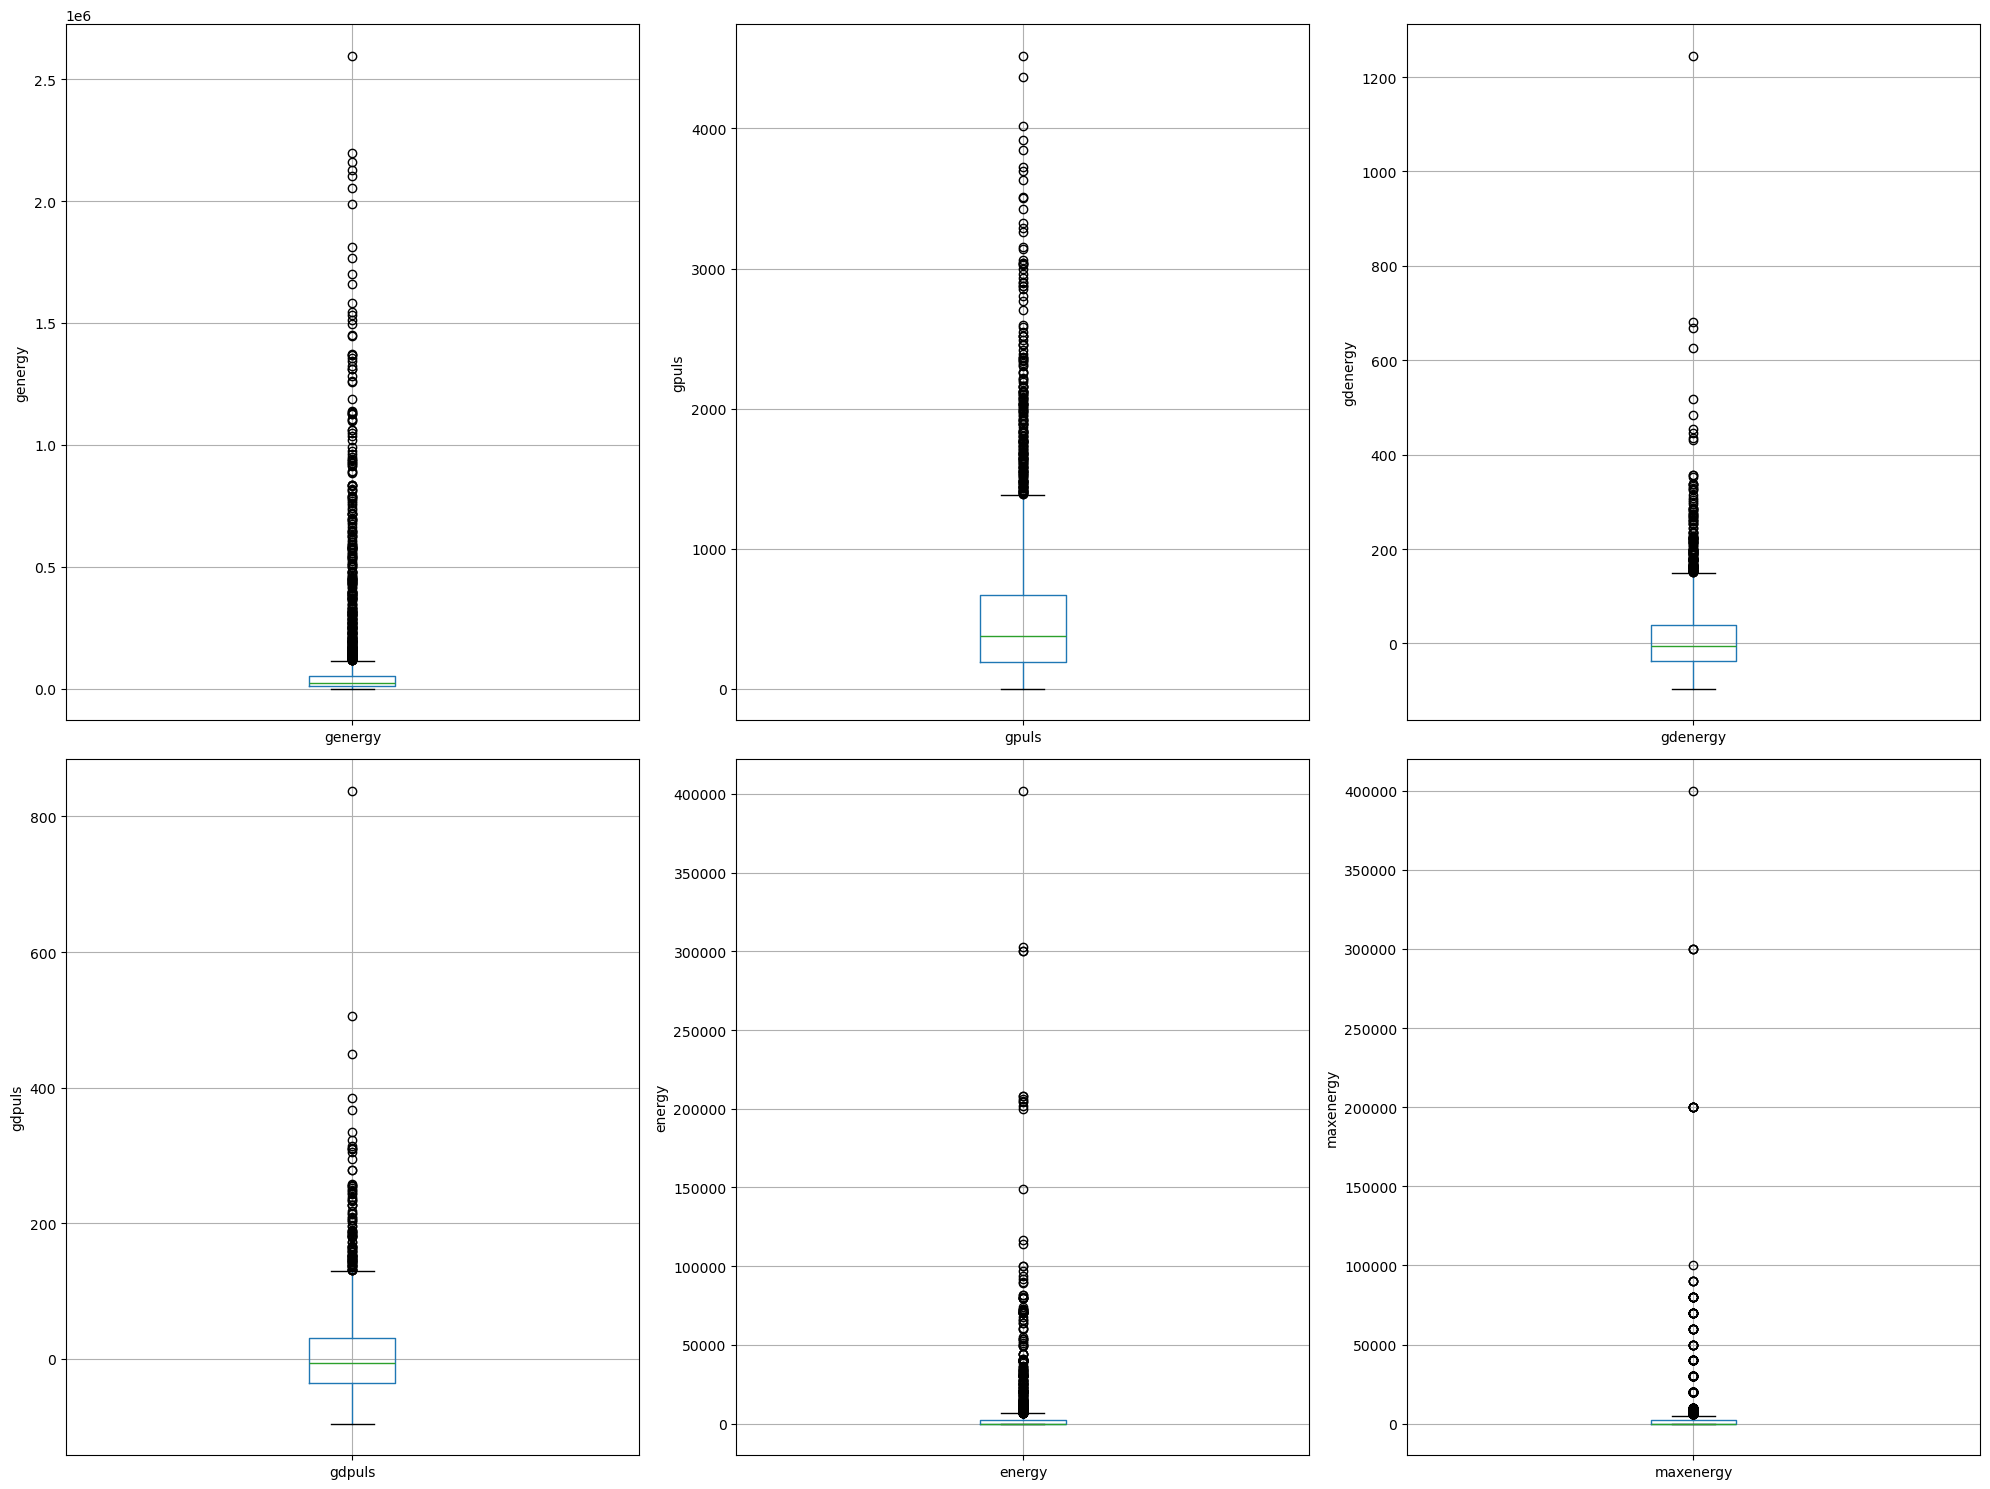

In [14]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Loop through the columns and create subplots
for i, column in enumerate(continuous_df.columns, 1):
  plt.subplot(2, 3, i)  # Create a subplot in a 2x3 grid
  fig = df.boxplot(column=column)
  fig.set_title('')
  fig.set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
# remove the duplicated rows
df.drop_duplicates(keep='first', inplace=True)
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0


In [16]:
# Reindex the DataFrame after dropping duplicates
df.reset_index(drop=True, inplace=True)
df.tail()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
2573,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0
2574,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0
2575,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0
2576,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0
2577,a,a,W,12750,235,-10,-10,a,0,0,0,0,0,0,0,0


In [17]:
# Check for the dimensions of the DataFrame after data cleaning
df.shape

(2578, 16)

In [18]:
# Save the cleaned DataFrame
X = df.drop(columns=label).values
y = df[label].values

# Show the shape of the data
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2578, 15)
y shape:  (2578,)


#### Split the dataset
Split the dataset into training, validation and test sets.

In [19]:
# Split the dataset into training, validation, and test sets
# Training : Validation : Test = 7 : 1 : 2

seed_num = 42
np.random.seed(seed_num)

# Split the dataset into training and test sets
# test_size = 0.2 as (training dataset + validation dataset) : test dataset = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num,
  # stratify=y
)

# Split the training dataset into training and validation sets
# test_size = 0.125 as training dataset : validation dataset = 7 : 1
X_train, X_vald, y_train, y_vald = train_test_split(
  X_train,
  y_train,
  test_size=0.125,
  random_state=seed_num,
  # stratify=y_train
)

# Show the shape of the datasets
print("Original dataset shape:")
print("X shape:", X.shape, ", y shape:", y.shape, "\n")

print("Training set shape:")
print("X_train shape:", X_train.shape, ", y_train shape:", y_train.shape, "\n")

print("Validation set shape:")
print("X_vald shape:", X_vald.shape, ", y_vald shape:", y_vald.shape, "\n")

print("Test set shape: ")
print("X_test shape:", X_test.shape, ", y_test shape:", y_test.shape)

Original dataset shape:
X shape: (2578, 15) , y shape: (2578,) 

Training set shape:
X_train shape: (1804, 15) , y_train shape: (1804,) 

Validation set shape:
X_vald shape: (258, 15) , y_vald shape: (258,) 

Test set shape: 
X_test shape: (516, 15) , y_test shape: (516,)


#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:

This section outlines a comprehensive data preprocessing pipeline designed to prepare the Seismic Bumps Dataset for a classification task aimed at predicting whether a high-energy seismic bump will occur in the next shift.

The process includes **label encoding and data scaling**: ordinal categorical features are transformed using `Label Encoding,` while nominal features are encoded with `One-Hot Encoding`. Numerical features are scaled using the `Robust Scaler` to reduce the impact of outliers and skewed distributions. To address class imbalance, the `SMOTE (Synthetic Minority Over-sampling Technique)` is applied exclusively to the training set.

##### Label encoding & data scaling

Based on the column description, DataFrame consists of

Categorical data includes
- Ordinal: `seismic`, `seismoacoustic`, and `ghazard`
- Nominal: `shift`

and numerical data.

The data are encoded based on their categories:
- Ordinal categorical values using **Label Encoding**,
- Nominal categorical values using **One Hot Encoding**,
- and Numerical values using **Robust Scaler**

**Robust Scaler** is used instead of **MinMaxScaler** as seismic data often includes extreme value (e.g. sudden energy spikes, zero-heavy counts). RoubstScaler is typically safer as it is good for data that has outliers or heavy skew.

In [20]:
# Convert X_train to a DataFrame for scaling
X_train_df = pd.DataFrame(X_train, columns=df.drop(columns=label).columns)
X_vald_df = pd.DataFrame(X_vald, columns=df.drop(columns=label).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop(columns=label).columns)

In [21]:
# Apply Label Encoding to the ordinal categorical columns
label_encoder = LabelEncoder()

for column in categorical_df.columns:
  if column != 'shift':
    # Transform the training, validation, and test sets
    X_train_df[column] = label_encoder.fit_transform(X_train_df[column])
    X_vald_df[column] = label_encoder.transform(X_vald_df[column])
    X_test_df[column] = label_encoder.transform(X_test_df[column])

In [22]:
# Apply One-Hot Encoding to the nominal categorical columns
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

def onehot_encode_and_concat(df, column, onehot_encoder): 
  onehot_encoded = onehot_encoder.transform(df[[column]])
  onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([column]), index=df.index)
  df = df.drop(column, axis=1) # drop the original column
  return pd.concat([df, onehot_df], axis=1)

onehot_encoder.fit(X_train_df[['shift']])

# Transform the training, validation, and test sets
X_train_df = onehot_encode_and_concat(X_train_df, 'shift', onehot_encoder)
X_vald_df = onehot_encode_and_concat(X_vald_df, 'shift', onehot_encoder)
X_test_df = onehot_encode_and_concat(X_test_df, 'shift', onehot_encoder)

In [23]:
# Apply Robust Scaling to the numerical columns
numerical_scaler = RobustScaler()

# Transform the training, validation, and test sets
X_train_df[numerical_df.columns] = numerical_scaler.fit_transform(X_train_df[numerical_df.columns])
X_vald_df[numerical_df.columns] = numerical_scaler.transform(X_vald_df[numerical_df.columns])
X_test_df[numerical_df.columns] = numerical_scaler.transform(X_test_df[numerical_df.columns])

In [24]:
# Checkpoint the columns after encoding
columns_after_encoding = X_train_df.columns
columns_after_encoding

Index(['seismic', 'seismoacoustic', 'genergy', 'gpuls', 'gdenergy', 'gdpuls',
       'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5',
       'energy', 'maxenergy', 'shift_N', 'shift_W'],
      dtype='object')

In [25]:
# Display the scaled columns of the training set
X_train_df[numerical_df.columns].head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,-0.524304,-0.241362,-0.842105,-0.350365,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,-0.346626,-0.226921,-0.342105,0.014599,1.0,0.0,1.0,0.0,0.0,0.357143,0.5
2,0.655498,-0.559051,-0.118421,-0.029197,3.0,2.0,1.0,0.0,0.0,0.607143,0.5
3,-0.412931,-0.162971,-0.105263,0.598540,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,-0.272770,0.059825,0.697368,0.510949,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [26]:
# Display the scaled columns of the validation set
X_vald_df[numerical_df.columns].head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,0.411279,0.507478,0.710526,0.467153,1.0,1.0,0.0,0.0,0.0,0.107143,0.15
1,0.342850,1.949458,1.631579,2.452555,2.0,2.0,0.0,0.0,0.0,0.392857,0.30
2,3.318075,2.853017,0.144737,0.379562,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
3,-0.534686,-0.528107,-0.894737,-0.905109,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
4,0.543889,-0.631253,-0.618421,-0.656934,0.0,0.0,0.0,0.0,0.0,0.000000,0.00


In [27]:
# Display the scaled columns of the test set
X_test_df[numerical_df.columns].head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,-0.592261,-0.767406,-1.039474,-1.109489,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,-0.328929,-0.101083,0.394737,0.802920,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.406796,-0.270242,0.368421,0.160584,3.0,0.0,3.0,0.0,0.0,1.428571,1.0
3,13.068429,4.051573,0.552632,0.686131,1.0,0.0,1.0,0.0,0.0,1.071429,1.5
4,-0.437471,-0.472408,-0.855263,-0.788321,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


##### Oversampling
**SMOTE (Synthetic Minority Over-sampling Technique)**, is used for oversampling the minority class in imbalanced datasets. It is only introduced to training dataset to prevent the unrealistic samples and data leakage in validation dataset and test dataset.

In [28]:
# Oversampling
# SMOTE
smote = SMOTE(random_state=seed_num, sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train_df, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

X_train = X_smote
y_train = y_smote

Original dataset shape: Counter({0: 1694, 1: 110})
Resample dataset shape: Counter({0: 1694, 1: 1694})


In [29]:
# Convert back to a NumPy array
X_vald = X_vald_df.values
X_test = X_test_df.values

#### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

Feature selection is then performed using the `SelectKBest` method with mutual information to retain the eight most informative variables.

The final output consists of clean, balanced, and scaled datasets, ready for model development and evaluation.

In [30]:
# Feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=8)
X_train = selector.fit_transform(X_train, y_train)

# Transform the validation and test sets using the same selector
X_vald = selector.transform(X_vald)
X_test = selector.transform(X_test)

# Get the feature names after encoding
selected_indices = selector.get_support(indices=True) # Get the indices of the selected features
selected_features = columns_after_encoding[selected_indices] # Get the names of the selected features
selected_features

Index(['gdenergy', 'gdpuls', 'nbumps', 'nbumps2', 'nbumps3', 'energy',
       'maxenergy', 'shift_N'],
      dtype='object')

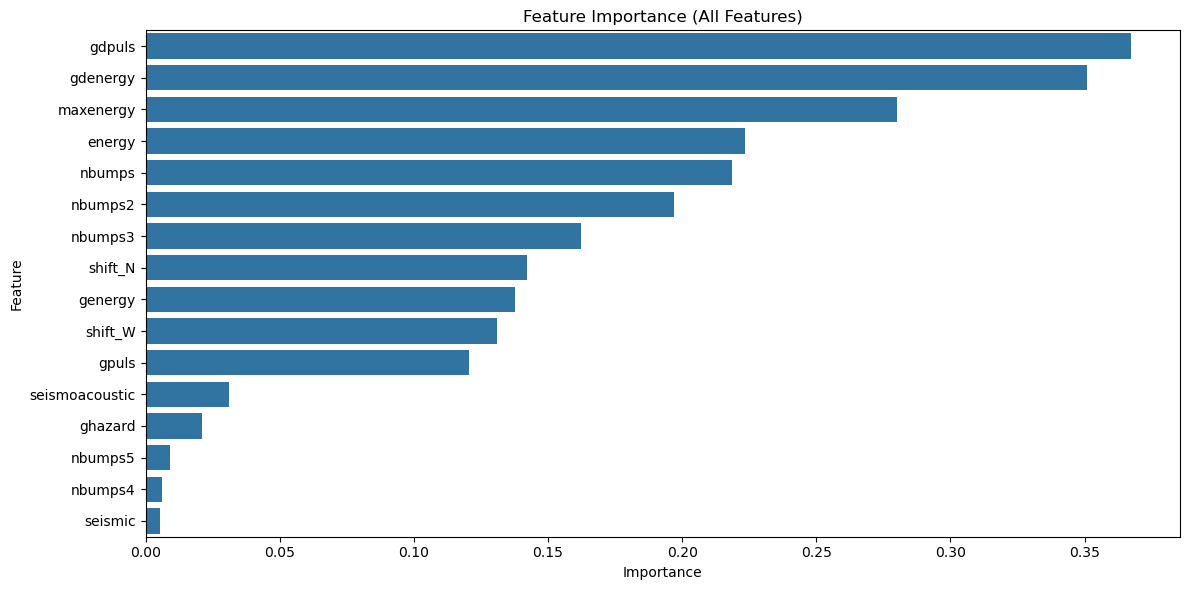

In [31]:
# Get all feature names BEFORE selection
all_feature_names = X_train_df.columns  # assuming x_train is a DataFrame

# Get all feature scores from the selector
all_scores = selector.scores_  # same length as original feature count

# Create a DataFrame of all features and their scores
feature_importances = pd.DataFrame({
  "feature": all_feature_names,
  "importance": all_scores
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Plot all features
plt.figure(figsize=(12, max(6, len(feature_importances) * 0.3)))  # dynamic height
sns.barplot(x="importance", y="feature", data=feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (All Features)")
plt.tight_layout()
plt.show()


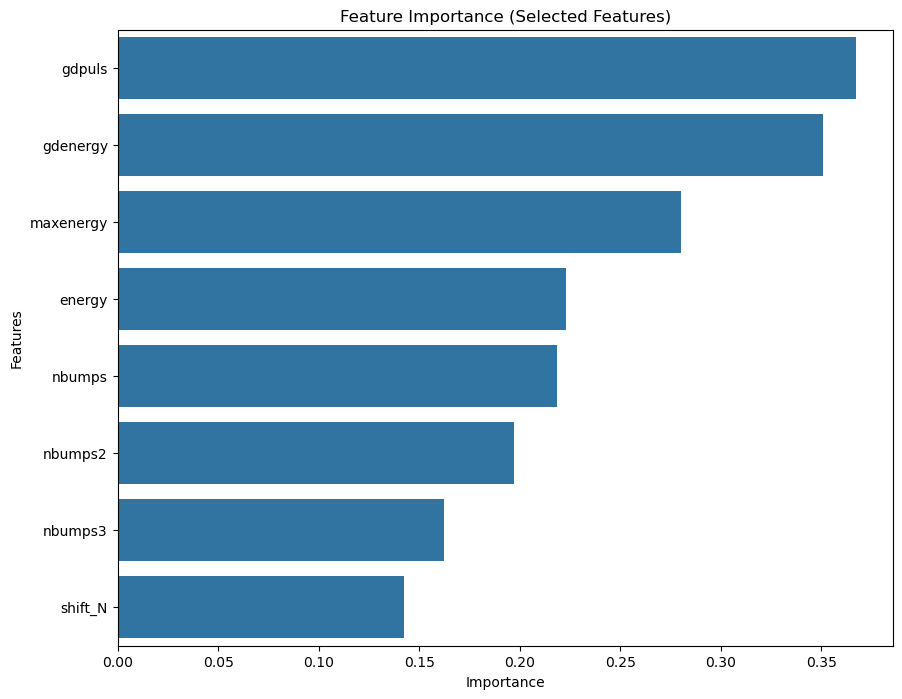

In [32]:
# Get the feature importances
# Get the indices of the selected features
importances = selector.scores_[selected_indices] # Get the scores of the selected features
feature_importances = pd.DataFrame({"feature": selected_features, "importance": importances}) # Create a DataFrame with feature names and their importances
feature_importances = feature_importances.sort_values("importance", ascending=False) # Sort the DataFrame by importance

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances['importance'], y=feature_importances['feature'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Selected Features)')
plt.show()

In [33]:
# Store the selected features back into the training set
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_train_df.head()

,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,energy,maxenergy,shift_N
0,-0.842105,-0.350365,0.0,0.0,0.0,0.000000,0.0,1.0
1,-0.342105,0.014599,1.0,0.0,1.0,0.357143,0.5,0.0
2,-0.118421,-0.029197,3.0,2.0,1.0,0.607143,0.5,1.0
3,-0.105263,0.598540,0.0,0.0,0.0,0.000000,0.0,1.0
4,0.697368,0.510949,0.0,0.0,0.0,0.000000,0.0,1.0


In [34]:
# Store the selected features back into the validation set
X_vald_df = pd.DataFrame(X_vald, columns=selected_features)
X_vald_df.head()

,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,energy,maxenergy,shift_N
0,0.710526,0.467153,1.0,1.0,0.0,0.107143,0.15,0.0
1,1.631579,2.452555,2.0,2.0,0.0,0.392857,0.30,0.0
2,0.144737,0.379562,0.0,0.0,0.0,0.000000,0.00,0.0
3,-0.894737,-0.905109,0.0,0.0,0.0,0.000000,0.00,1.0
4,-0.618421,-0.656934,0.0,0.0,0.0,0.000000,0.00,1.0


In [35]:
# Store the selected features back into the test set
X_test_df = pd.DataFrame(X_test, columns=selected_features)
X_test_df.head()

,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,energy,maxenergy,shift_N
0,-1.039474,-1.109489,0.0,0.0,0.0,0.000000,0.0,1.0
1,0.394737,0.802920,0.0,0.0,0.0,0.000000,0.0,1.0
2,0.368421,0.160584,3.0,0.0,3.0,1.428571,1.0,0.0
3,0.552632,0.686131,1.0,0.0,1.0,1.071429,1.5,0.0
4,-0.855263,-0.788321,0.0,0.0,0.0,0.000000,0.0,0.0


In [36]:
# Convert back to a NumPy array
X_train = X_train_df.values
X_vald = X_vald_df.values
X_test = X_test_df.values

In [37]:
# Check the shape of the datasets after oversampling
print("Training set shape:")
print("X_train shape:", X_train.shape, ", y_train shape:", y_train.shape)
print("X_train_df shape:", X_train_df.shape, ", y_train shape:", y_train.shape, "\n")

print("Validation set shape:")
print("X_vald shape:", X_vald.shape, ", y_vald shape:", y_vald.shape)
print("X_vald_df shape:", X_vald_df.shape, ", y_vald shape:", y_vald.shape, "\n")

print("Test set shape: ")
print("X_test shape:", X_test.shape, ", y_test shape:", y_test.shape)
print("X_test_df shape:", X_test_df.shape, ", y_test shape:", y_test.shape)

Training set shape:
X_train shape: (3388, 8) , y_train shape: (3388,)
X_train_df shape: (3388, 8) , y_train shape: (3388,) 

Validation set shape:
X_vald shape: (258, 8) , y_vald shape: (258,)
X_vald_df shape: (258, 8) , y_vald shape: (258,) 

Test set shape: 
X_test shape: (516, 8) , y_test shape: (516,)
X_test_df shape: (516, 8) , y_test shape: (516,)


#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description:

##### Variables & Functions

In [38]:
# Repeated Stratified K-Fold Cross Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=seed_num)

In [39]:
def plot_confusion_matrices_side_by_side(y_true, y_pred_default, y_pred_optimized, model_name):
    """
    Plot confusion matrices for two models side by side
    """
    cm_default = confusion_matrix(y_true, y_pred_default)
    cm_optimized = confusion_matrix(y_true, y_pred_optimized)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Default model
    sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - Default {model_name}')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    # Optimized model
    sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - Optimized {model_name}')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

In [40]:
def evaluate_validation_set(y_true, y_pred):
    """
    Evaluate the validation set using various metrics and print the results.
    
    Parameters:
    y_true (array-like): True labels of the validation set.
    y_pred (array-like): Predicted labels of the validation set.
    """
    print("\n")
    print("📊 Evaluation metrics for validation set:")
    print(f"Validation set accuracy: {accuracy_score(y_true, y_pred):.6f}")
    print(f"Validation set precision: {precision_score(y_true, y_pred):.6f}")
    print(f"Validation set recall: {recall_score(y_true, y_pred):.6f}")
    print(f"Validation set f1 score: {f1_score(y_true, y_pred):.6f}")
    print("\nValidation set confusion matrix: \n", confusion_matrix(y_true, y_pred))

    # Print the classification report for the validation set
    print("\nValidation set classification report: \n", classification_report(y_vald, y_pred))

In [41]:
def plot_roc_curve(y_true, model, model_short_name):
    """
    Plot ROC curve for a model.
    
    Parameters:
    y_true (array-like): True labels of the validation set.
    model (object): Trained model.
    model_short_name (str): Short name of the model for labeling the plot.
    """
    
    # Get probability predictions for class 1
    y_proba = model.predict_proba(X_vald)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Optimized {model_short_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [42]:
def plot_model_comparison(y_vald, y_pred_default, y_pred_optimized, model_name, model_short_name):
    """
    Plot the model comparison for the validation set
    """
    # Prepare data for the bar graph
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    default_scores = [
        accuracy_score(y_vald, y_pred_default),
        precision_score(y_vald, y_pred_default),
        recall_score(y_vald, y_pred_default),
        f1_score(y_vald, y_pred_default),
    ]
    optimized_scores = [
        accuracy_score(y_vald, y_pred_optimized),
        precision_score(y_vald, y_pred_optimized),
        recall_score(y_vald, y_pred_optimized),
        f1_score(y_vald, y_pred_optimized),
    ]

    # Plot the bar graph
    x = np.arange(len(metrics))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, default_scores, width, label='Default ' + model_short_name)
    bars2 = ax.bar(x + width/2, optimized_scores, width, label='Optimized ' + model_short_name)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Performance Comparison of Default and Optimized ' + model_name + ' (Weighted Average)')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Annotate bars with their values
    for bar in bars1:
            height = bar.get_height()
            ax.annotate(f'{height:.6f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars2:
            height = bar.get_height()
            ax.annotate(f'{height:.6f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

##### Support Vector Machine (SVM)

An instance of SVM with default parameters

In [43]:
# Initialize the Support Vector Machine
svm_default_model = SVC()

# Fit the Support Vector Machine on the training set
svm_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_svm_default_model_pred_val = svm_default_model.predict(X_vald)

# Print the default parameters of the Support Vector Machine
print("Default parameters of Support Vector Machine: \n", svm_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_svm_default_model_pred_val)

Default parameters of Support Vector Machine: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.724806
Validation set precision: 0.115942
Validation set recall: 0.444444
Validation set f1 score: 0.183908

Validation set confusion matrix: 
 [[179  61]
 [ 10   8]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.95      0.75      0.83       240
           1       0.12      0.44      0.18        18

    accuracy                           0.72       258
   macro avg       0.53      0.60      0.51       258
weighted avg       0.89      0.72      0.79       258



An instance of SVM linear kernel

In [44]:
# Initialize the SVM linear model
svm_linear_default_model = SVC(kernel='linear', C=1)

# Fit the SVM linear model on the training set
svm_linear_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_svm_linear_default_model_pred_val = svm_linear_default_model.predict(X_vald)

# Print the default parameters of the SVM linear model
print("Default parameters of SVM linear model: \n", svm_linear_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_svm_linear_default_model_pred_val)

Default parameters of SVM linear model: 
 {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.751938
Validation set precision: 0.116667
Validation set recall: 0.388889
Validation set f1 score: 0.179487

Validation set confusion matrix: 
 [[187  53]
 [ 11   7]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       240
           1       0.12      0.39      0.18        18

    accuracy                           0.75       258
   macro avg       0.53      0.58      0.52       258
weighted avg       0.89      0.75      0.81       258



An instance of SVM Radial Basis Function (RBF) kernel

In [45]:
# Initialize the SVM RBF model
svm_rbf_default_model = SVC(kernel='rbf', C=10, gamma=0.00001)

# Fit the SVM RBF model on the training set
svm_rbf_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_svm_rbf_default_model_pred_val = svm_rbf_default_model.predict(X_vald)

# Print the default parameters of the SVM RBF model
print("Default parameters of SVM RBF model: \n", svm_rbf_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_svm_rbf_default_model_pred_val)

Default parameters of SVM RBF model: 
 {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1e-05, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.825581
Validation set precision: 0.114286
Validation set recall: 0.222222
Validation set f1 score: 0.150943

Validation set confusion matrix: 
 [[209  31]
 [ 14   4]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       240
           1       0.11      0.22      0.15        18

    accuracy                           0.83       258
   macro avg       0.53      0.55      0.53       258
weighted avg       0.88      0.83      0.85       258



An instance of SVM sigmoid kernel

In [46]:
# Initialize the SVM sigmoid model
svm_sigmoid_default_model = SVC(kernel='sigmoid', C=1, gamma=0.1, coef0=1)

# Fit the SVM sigmoid model on the training set
svm_sigmoid_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_svm_sigmoid_default_model_pred_val = svm_sigmoid_default_model.predict(X_vald)

# Print the default parameters of the SVM sigmoid model
print("Default parameters of SVM sigmoid model: \n", svm_sigmoid_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_svm_sigmoid_default_model_pred_val)

Default parameters of SVM sigmoid model: 
 {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.581395
Validation set precision: 0.098214
Validation set recall: 0.611111
Validation set f1 score: 0.169231

Validation set confusion matrix: 
 [[139 101]
 [  7  11]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.95      0.58      0.72       240
           1       0.10      0.61      0.17        18

    accuracy                           0.58       258
   macro avg       0.53      0.60      0.44       258
weighted avg       0.89      0.58      0.68       258



Hyperparameter tuning using GridSearchCV for SVM with linear, RBF, sigmoid kernel

In [47]:
# Set the hyperparameter grid for the SVM model
svm_param_grid = {
    'C': [0.1, 1, 5, 10],
    'coef0': [0, 0.1, 0.5],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
}

# Initialize the base SVM model
svm = SVC(
    probability=True,  # Enable probability estimates for ROC curve
)

# Set up GridSearchCV
svm_grid_search = GridSearchCV(
    estimator=svm,
    param_grid=svm_param_grid,
    scoring="recall_macro", # Choose to refit the base model based on recall score
    refit="recall_macro",
    cv=cv,
    verbose=2,
    n_jobs=-1,
    error_score=0,
)

# Fit the grid search to training data
svm_grid_results = svm_grid_search.fit(X_train, y_train)

# Output best hyperparameters and best cross-validation score
print(f"✅ Best hyperparameters found: {svm_grid_results.best_params_}")
print(f"✅ Best cross-validation score: {svm_grid_results.best_score_:.6f}")

# Get the best model
svm_best_model = svm_grid_results.best_estimator_

# Make predictions on the validation set
y_svm_best_pred_val = svm_best_model.predict(X_vald)

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_svm_best_pred_val)

Fitting 25 folds for each of 108 candidates, totalling 2700 fits
✅ Best hyperparameters found: {'C': 10, 'coef0': 0, 'gamma': 10, 'kernel': 'rbf'}
✅ Best cross-validation score: 0.858203


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.825581
Validation set precision: 0.064516
Validation set recall: 0.111111
Validation set f1 score: 0.081633

Validation set confusion matrix: 
 [[211  29]
 [ 16   2]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       240
           1       0.06      0.11      0.08        18

    accuracy                           0.83       258
   macro avg       0.50      0.50      0.49       258
weighted avg       0.87      0.83      0.85       258



In [48]:
# Convert the results of the GridSearchCV into a DataFrame
# Sort the DataFrame by the mean test score in descending order
# Display the top 10 configurations with the highest mean test scores
results_svm_df = pd.DataFrame(svm_grid_search.cv_results_)
results_svm_df.sort_values(
    by=['rank_test_score', 'mean_test_score'], 
    ascending=[True, False]
).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_gamma,param_kernel,params,split0_test_score,...,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score
88,4.277058,0.441795,0.222110,0.021210,10.0,0.0,10.0,rbf,"{'C': 10, 'coef0': 0, 'gamma': 10, 'kernel': '...",0.846608,...,0.871485,0.864097,0.879056,0.861357,0.867257,0.825679,0.872969,0.858203,0.015488,1
97,4.319161,0.656743,0.221302,0.030519,10.0,0.1,10.0,rbf,"{'C': 10, 'coef0': 0.1, 'gamma': 10, 'kernel':...",0.846608,...,0.871485,0.864097,0.879056,0.861357,0.867257,0.825679,0.872969,0.858203,0.015488,1
106,4.072217,0.540275,0.206379,0.026841,10.0,0.5,10.0,rbf,"{'C': 10, 'coef0': 0.5, 'gamma': 10, 'kernel':...",0.846608,...,0.871485,0.864097,0.879056,0.861357,0.867257,0.825679,0.872969,0.858203,0.015488,1
61,3.601093,0.782424,0.180206,0.023668,5.0,0.0,10.0,rbf,"{'C': 5, 'coef0': 0, 'gamma': 10, 'kernel': 'r...",0.842183,...,0.815508,0.809311,0.884956,0.870206,0.809735,0.825684,0.872951,0.850946,0.022922,4
70,3.376015,0.615947,0.184197,0.026152,5.0,0.1,10.0,rbf,"{'C': 5, 'coef0': 0.1, 'gamma': 10, 'kernel': ...",0.842183,...,0.815508,0.809311,0.884956,0.870206,0.809735,0.825684,0.872951,0.850946,0.022922,4
79,4.628697,0.629967,0.245838,0.038552,5.0,0.5,10.0,rbf,"{'C': 5, 'coef0': 0.5, 'gamma': 10, 'kernel': ...",0.842183,...,0.815508,0.809311,0.884956,0.870206,0.809735,0.825684,0.872951,0.850946,0.022922,4
85,2.375357,0.388502,0.148714,0.036781,10.0,0.0,1.0,rbf,"{'C': 10, 'coef0': 0, 'gamma': 1, 'kernel': 'r...",0.853982,...,0.844875,0.847873,0.858407,0.852507,0.865782,0.841869,0.843479,0.846874,0.009064,7
94,2.201797,0.447018,0.132676,0.028582,10.0,0.1,1.0,rbf,"{'C': 10, 'coef0': 0.1, 'gamma': 1, 'kernel': ...",0.853982,...,0.844875,0.847873,0.858407,0.852507,0.865782,0.841869,0.843479,0.846874,0.009064,7
103,2.386155,0.453530,0.148044,0.029846,10.0,0.5,1.0,rbf,"{'C': 10, 'coef0': 0.5, 'gamma': 1, 'kernel': ...",0.853982,...,0.844875,0.847873,0.858407,0.852507,0.865782,0.841869,0.843479,0.846874,0.009064,7
58,1.926071,0.364758,0.130385,0.023814,5.0,0.0,1.0,rbf,"{'C': 5, 'coef0': 0, 'gamma': 1, 'kernel': 'rbf'}",0.842183,...,0.838971,0.846398,0.856932,0.858407,0.858407,0.837457,0.839028,0.846283,0.010839,10


In [49]:
results_svm_df[['params', 'mean_test_score', 'rank_test_score']].sort_values(
    by=['rank_test_score', 'mean_test_score'],
    ascending=[True, False]
).head(10)

,params,mean_test_score,rank_test_score
88,"{'C': 10, 'coef0': 0, 'gamma': 10, 'kernel': '...",0.858203,1
97,"{'C': 10, 'coef0': 0.1, 'gamma': 10, 'kernel':...",0.858203,1
106,"{'C': 10, 'coef0': 0.5, 'gamma': 10, 'kernel':...",0.858203,1
61,"{'C': 5, 'coef0': 0, 'gamma': 10, 'kernel': 'r...",0.850946,4
70,"{'C': 5, 'coef0': 0.1, 'gamma': 10, 'kernel': ...",0.850946,4
79,"{'C': 5, 'coef0': 0.5, 'gamma': 10, 'kernel': ...",0.850946,4
85,"{'C': 10, 'coef0': 0, 'gamma': 1, 'kernel': 'r...",0.846874,7
94,"{'C': 10, 'coef0': 0.1, 'gamma': 1, 'kernel': ...",0.846874,7
103,"{'C': 10, 'coef0': 0.5, 'gamma': 1, 'kernel': ...",0.846874,7
58,"{'C': 5, 'coef0': 0, 'gamma': 1, 'kernel': 'rbf'}",0.846283,10


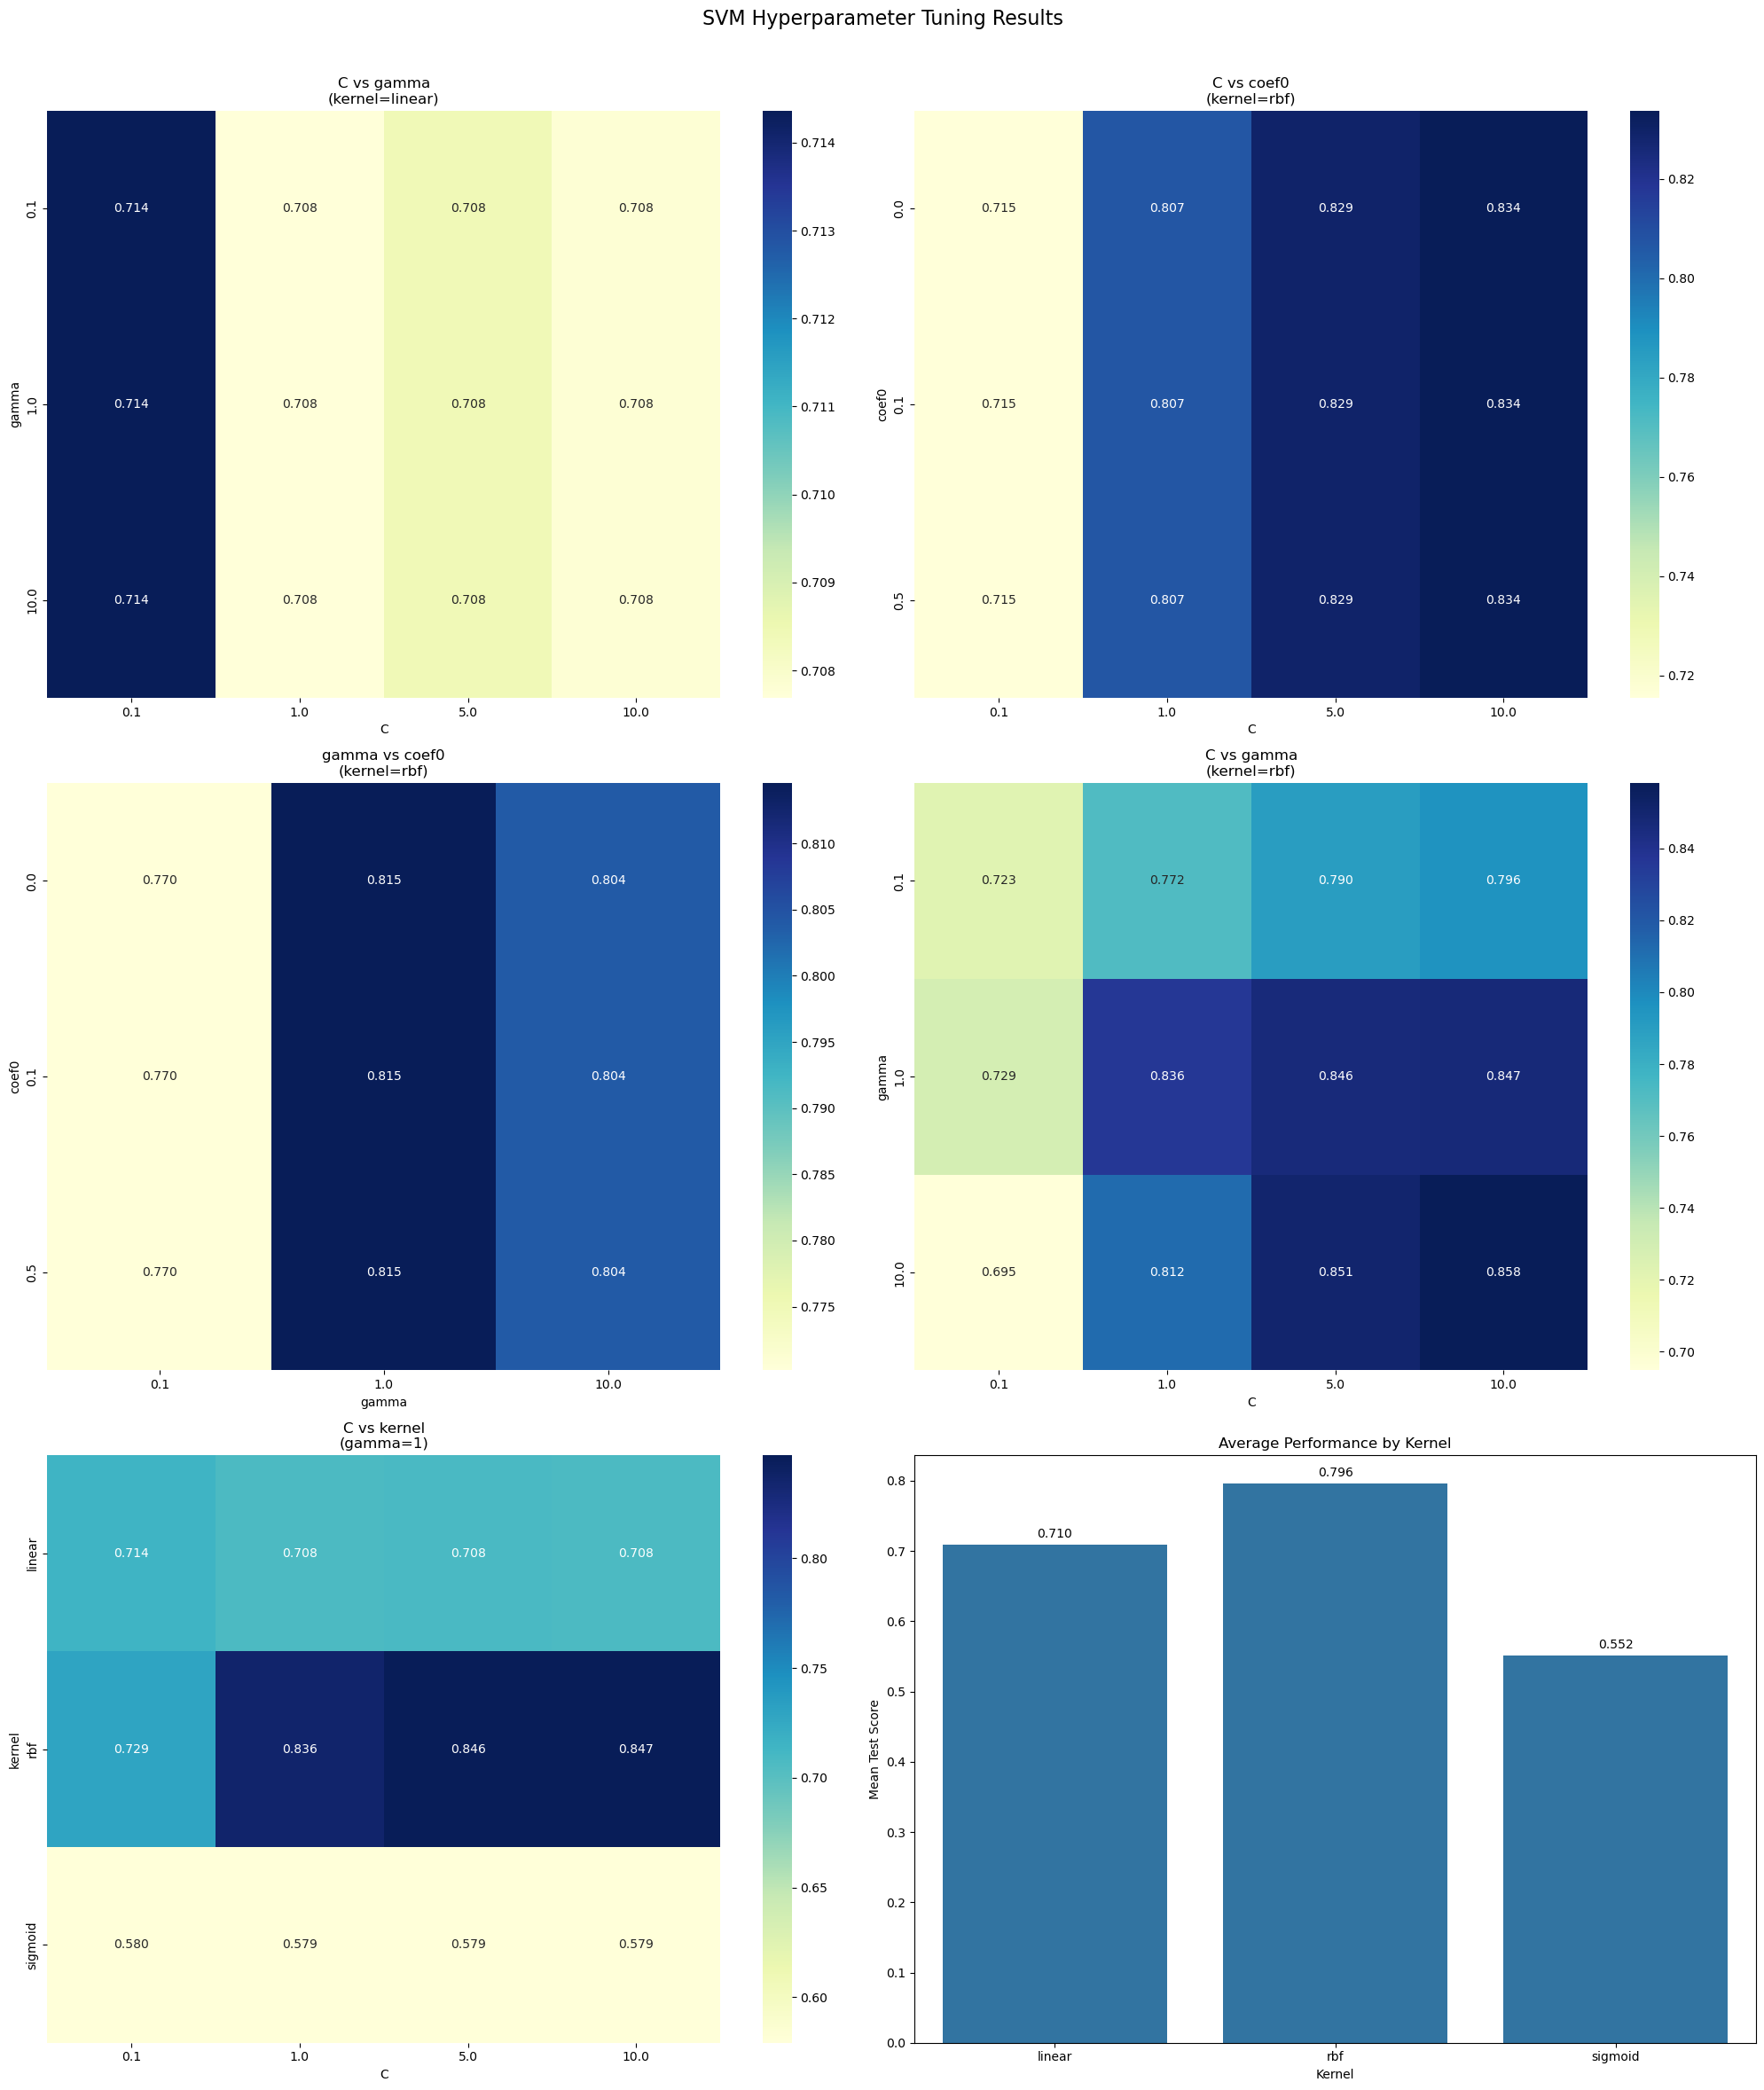

In [50]:
# Convert the results of the GridSearchCV into a DataFrame
results_svm_df = pd.DataFrame(svm_grid_search.cv_results_)

# Set up a 3x2 grid of subplots to include all visualizations
fig, axes = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle('SVM Hyperparameter Tuning Results', fontsize=16)

# Function to safely create a heatmap, handling empty dataframes
def safe_heatmap(filtered_df, x_param, y_param, ax, title):
    if filtered_df.empty:
        ax.text(0.5, 0.5, f"No data for\n{title}", 
                ha='center', va='center', fontsize=12)
        ax.set_title(title)
        return
    
    pivot = filtered_df.pivot_table(
        values='mean_test_score',
        index=f'param_{y_param}',
        columns=f'param_{x_param}'
    )
    
    if pivot.empty or pivot.size == 0:
        ax.text(0.5, 0.5, f"No data for\n{title}", 
                ha='center', va='center', fontsize=12)
        ax.set_title(title)
        return
        
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap='YlGnBu', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_param)
    ax.set_ylabel(y_param)

# 1. C vs gamma (for linear kernel)
df_filtered1 = results_svm_df[results_svm_df['param_kernel'] == 'linear']
safe_heatmap(
    df_filtered1, 
    'C', 
    'gamma', 
    axes[0, 0], 
    'C vs gamma\n(kernel=linear)'
)

# 2. C vs coef0 (for rbf kernel)
df_filtered2 = results_svm_df[results_svm_df['param_kernel'] == 'rbf']
safe_heatmap(
    df_filtered2, 
    'C', 
    'coef0', 
    axes[0, 1], 
    'C vs coef0\n(kernel=rbf)'
)

# 3. gamma vs coef0 (for rbf kernel)
df_filtered3 = results_svm_df[results_svm_df['param_kernel'] == 'rbf']
safe_heatmap(
    df_filtered3, 
    'gamma', 
    'coef0', 
    axes[1, 0], 
    'gamma vs coef0\n(kernel=rbf)'
)

# 4. C vs gamma (for rbf kernel)
df_filtered4 = results_svm_df[results_svm_df['param_kernel'] == 'rbf']
safe_heatmap(
    df_filtered4, 
    'C', 
    'gamma', 
    axes[1, 1], 
    'C vs gamma\n(kernel=rbf)'
)

# 5. C vs kernel
df_filtered5 = results_svm_df[results_svm_df['param_gamma'] == 1]
safe_heatmap(
    df_filtered5, 
    'C', 
    'kernel', 
    axes[2, 0], 
    'C vs kernel\n(gamma=1)'
)

# 6. Bar chart of kernel performance
kernel_scores = results_svm_df.groupby('param_kernel')['mean_test_score'].mean()
sns.barplot(x=kernel_scores.index, y=kernel_scores.values, ax=axes[2, 1])
axes[2, 1].set_title('Average Performance by Kernel')
axes[2, 1].set_xlabel('Kernel')
axes[2, 1].set_ylabel('Mean Test Score')
for i, v in enumerate(kernel_scores.values):
    axes[2, 1].text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

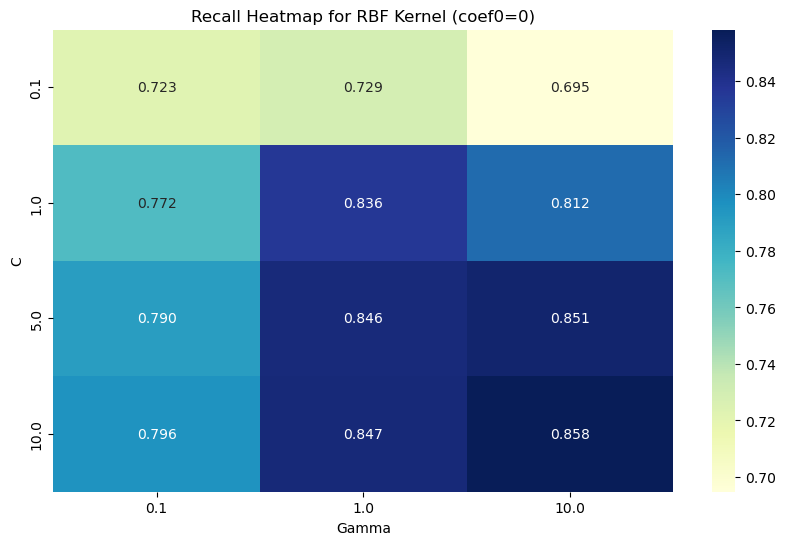

In [51]:
# Filter for one kernel and one coef0 for simplicity
svm_subset = results_svm_df[
    (results_svm_df['param_kernel'] == 'rbf') &
    (results_svm_df['param_coef0'] == 0.0)
]

pivot = svm_subset.pivot_table(
    index='param_C',
    columns='param_gamma',
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Recall Heatmap for RBF Kernel (coef0=0)')
plt.ylabel('C')
plt.xlabel('Gamma')
plt.show()


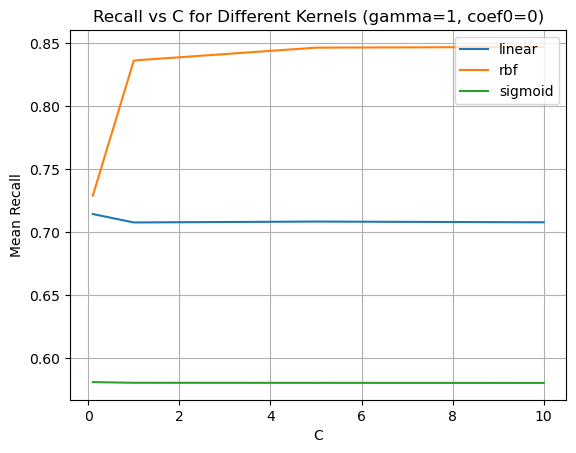

In [52]:
# Track recall for different kernels across C values
for svm_kernel in svm_param_grid['kernel']:
    svm_subset = results_svm_df[
        (results_svm_df['param_kernel'] == svm_kernel) &
        (results_svm_df['param_gamma'] == 1) & 
        (results_svm_df['param_coef0'] == 0.0)
    ]
    plt.plot(svm_subset['param_C'], svm_subset['mean_test_score'], label=svm_kernel)

plt.title("Recall vs C for Different Kernels (gamma=1, coef0=0)")
plt.xlabel("C")
plt.ylabel("Mean Recall")
plt.legend()
plt.grid(True)
plt.show()


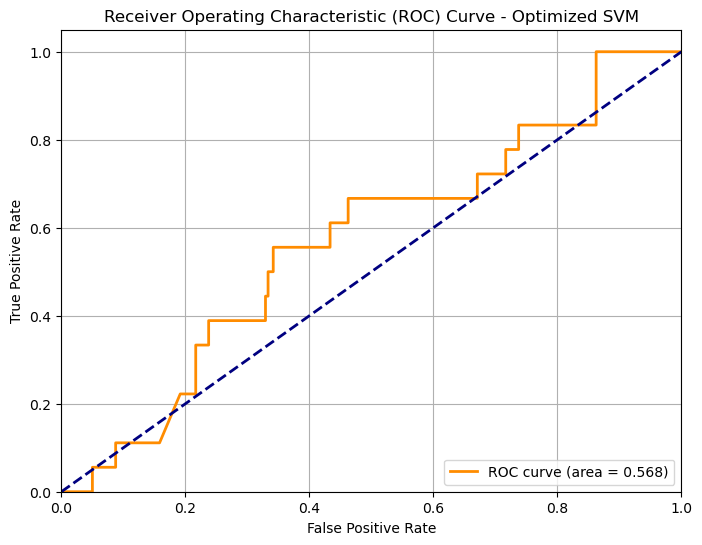

In [53]:
# Plot ROC curve for the optimized SVM model
plot_roc_curve(y_vald, svm_best_model, "SVM")

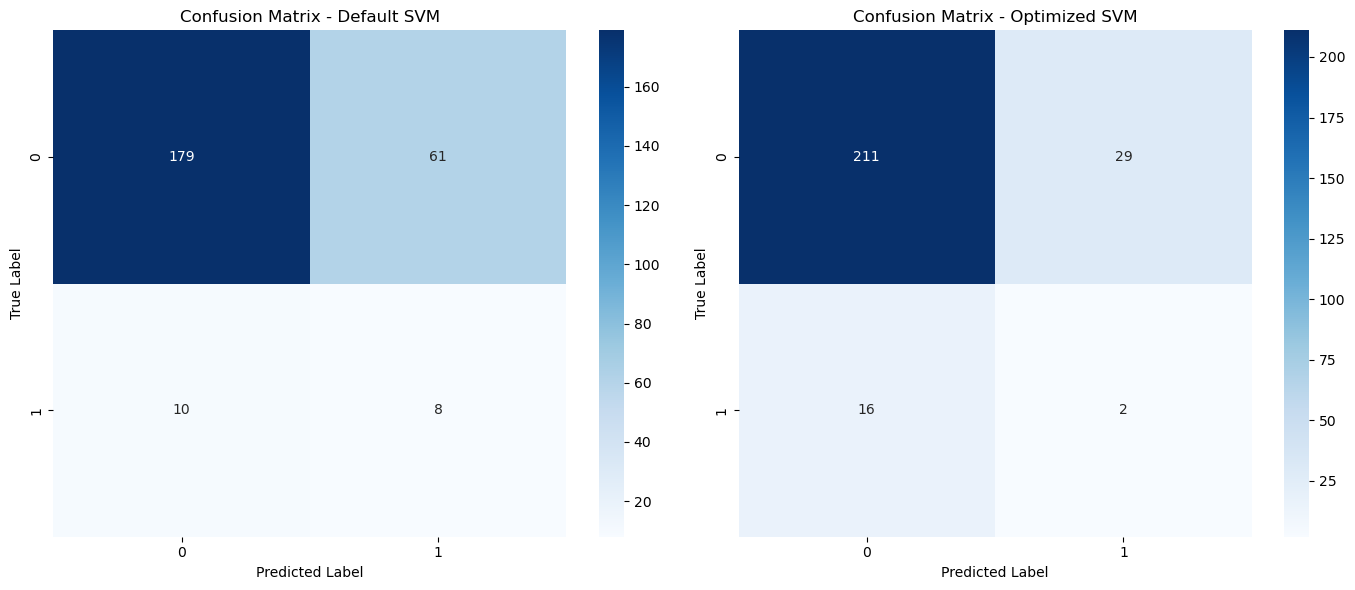

In [54]:
plot_confusion_matrices_side_by_side(y_vald, y_svm_default_model_pred_val, y_svm_best_pred_val, "SVM")

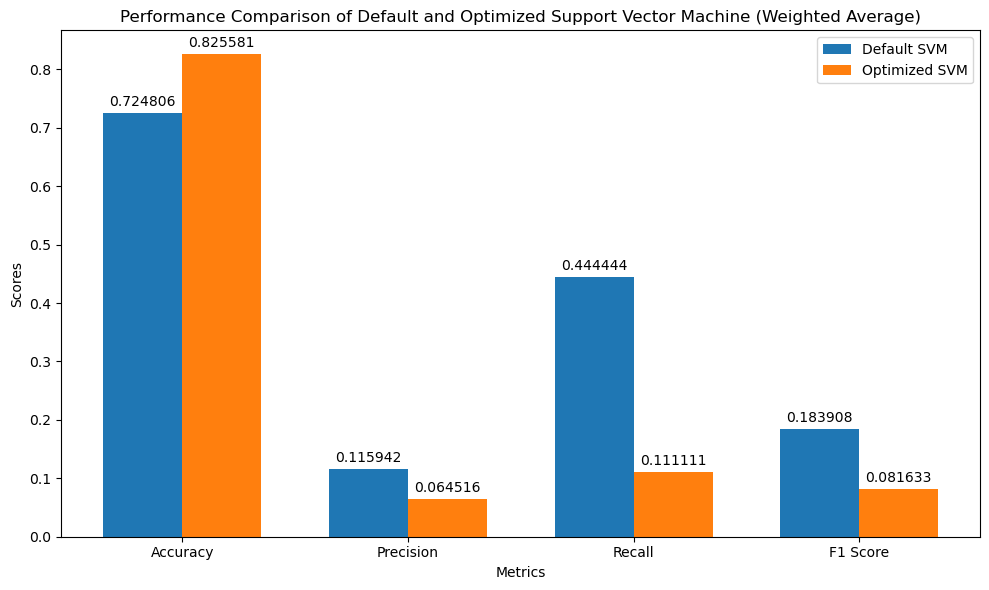

In [55]:
plot_model_comparison(y_vald, y_svm_default_model_pred_val, y_svm_best_pred_val, "Support Vector Machine", "SVM")

##### Decision Tree Classifier (DTC)

An instance of DTC with default parameters

In [56]:
# Initialize the Decision Tree Classifier
dtc_default_model = DecisionTreeClassifier(random_state=seed_num)

# Fit the Decision Tree Classifier on the training set
dtc_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_dtc_default_model_pred_val = dtc_default_model.predict(X_vald)

# Print the default parameters of the Decision Tree Classifier
print("Default parameters of Decision Tree Classifier: \n", dtc_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_dtc_default_model_pred_val)

Default parameters of Decision Tree Classifier: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.844961
Validation set precision: 0.133333
Validation set recall: 0.222222
Validation set f1 score: 0.166667

Validation set confusion matrix: 
 [[214  26]
 [ 14   4]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       240
           1       0.13      0.22      0.17        18

    accuracy                           0.84       258
   macro avg       0.54      0.56      0.54       258
weighted avg       0.88      0.84      0.86       258



Hyperparameter tuning using GridSearchCV for DTC

In [62]:
# Set the hyperparameter grid for the Decision Tree Classifier
# dtc_param_grid = {
#     'ccp_alpha': [0.0, 0.0005, 0.001],
#     'class_weight': ['balanced'],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [5, 7, 9, 11, 13],
#     'max_features': ['sqrt', 'log2'],
#     'max_leaf_nodes': [None],
#     'min_impurity_decrease': [0.0, 0.001, 0.01],
#     'min_samples_leaf': [1, 2, 4, 6],
#     'min_samples_split': [2, 4, 6],
#     'splitter': ['best'],
# }
dtc_param_grid = {
    'ccp_alpha': [0.0, 0.0001, 0.0005],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [9, 11, 13],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 30, 50],
    'min_impurity_decrease': [0.0, 0.001, 0.01],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5, 10],
    'splitter': ['best', 'random'],
}

# Initialize the base Decision Tree
dtc = DecisionTreeClassifier(random_state=seed_num)

# Set up GridSearchCV
dtc_grid_search = GridSearchCV(
    estimator=dtc,
    param_grid=dtc_param_grid,
    scoring="recall_macro", # Choose to refit the base model based on recall score
    cv=cv,
    verbose=2,
    n_jobs=-1,
    error_score=0,
)

# Fit the grid search to training data
dtc_grid_results = dtc_grid_search.fit(X_train, y_train)

# Output best hyperparameters and best cross-validation score
print(f"✅ Best hyperparameters found: {dtc_grid_results.best_params_}")
print(f"✅ Best cross-validation score: {dtc_grid_results.best_score_:.6f}")

# Get the best model
dtc_best_model = dtc_grid_results.best_estimator_

# Make predictions on the validation set
y_dtc_best_pred_val = dtc_best_model.predict(X_vald)

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_dtc_best_pred_val)

Fitting 25 folds for each of 7776 candidates, totalling 194400 fits
✅ Best hyperparameters found: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
✅ Best cross-validation score: 0.851006


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.771318
Validation set precision: 0.113208
Validation set recall: 0.333333
Validation set f1 score: 0.169014

Validation set confusion matrix: 
 [[193  47]
 [ 12   6]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.80      0.87       240
           1       0.11      0.33      0.17        18

    accuracy                           0.77       258
   macro avg       0.53      0.57      0.52       258
weighted avg       0.88      0.77      0.82       258



In [ ]:
# Make predictions on the test set
y_dtc_best_pred_test = dtc_best_model.predict(X_test)
# Print the evaluation metrics for the test set
print("\n")
print("📊 Evaluation metrics for test set:")
print(f"Test set accuracy: {accuracy_score(y_test, y_dtc_best_pred_test):.6f}")
print(f"Test set precision: {precision_score(y_test, y_dtc_best_pred_test):.6f}")
print(f"Test set recall: {recall_score(y_test, y_dtc_best_pred_test):.6f}")
print(f"Test set f1 score: {f1_score(y_test, y_dtc_best_pred_test):.6f}")
print("\nTest set confusion matrix: \n", confusion_matrix(y_test, y_dtc_best_pred_test))

In [63]:
# Convert the results of the GridSearchCV into a DataFrame
# Sort the DataFrame by the mean test score in descending order
# Display the top 10 configurations with the highest mean test scores
results_dtc_df = pd.DataFrame(dtc_grid_search.cv_results_)
results_dtc_df.sort_values(
    by=['rank_test_score', 'mean_test_score'], 
    ascending=[True, False]
).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_class_weight,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,...,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score
1728,0.008186,0.001080,0.002944,0.000565,0.0000,balanced,gini,13,sqrt,None,...,0.831579,0.836021,0.867257,0.845133,0.848083,0.874444,0.862574,0.851006,0.012691,1
4320,0.007906,0.002371,0.003395,0.002296,0.0001,balanced,gini,13,sqrt,None,...,0.831579,0.836021,0.867257,0.845133,0.848083,0.874444,0.862574,0.851006,0.012691,1
6912,0.007174,0.003068,0.002236,0.000694,0.0005,balanced,gini,13,sqrt,None,...,0.822725,0.830117,0.868732,0.849558,0.846608,0.872956,0.862579,0.849471,0.014016,3
432,0.005957,0.001326,0.003134,0.002391,0.0000,None,gini,13,sqrt,None,...,0.834512,0.849392,0.867257,0.845133,0.848083,0.852267,0.868496,0.849356,0.009332,4
3024,0.006846,0.003369,0.003552,0.003911,0.0001,None,gini,13,sqrt,None,...,0.834512,0.849392,0.867257,0.845133,0.848083,0.852267,0.868496,0.849356,0.009332,4
7026,0.009828,0.002250,0.002734,0.000657,0.0005,balanced,gini,13,log2,None,...,0.834525,0.855274,0.853982,0.845133,0.843658,0.861222,0.846433,0.848117,0.010799,6
5616,0.007798,0.004316,0.003321,0.001067,0.0005,None,gini,13,sqrt,None,...,0.834507,0.849400,0.868732,0.849558,0.846608,0.840451,0.874431,0.848058,0.011213,7
1836,0.012098,0.008166,0.003139,0.000812,0.0000,balanced,gini,13,log2,None,...,0.847821,0.815250,0.843658,0.852507,0.855457,0.865673,0.858132,0.847521,0.013618,8
4428,0.010885,0.005091,0.002733,0.000929,0.0001,balanced,gini,13,log2,None,...,0.847821,0.815250,0.843658,0.852507,0.855457,0.865673,0.858132,0.847521,0.013618,8
7020,0.009923,0.002126,0.003086,0.000907,0.0005,balanced,gini,13,log2,None,...,0.849287,0.813775,0.842183,0.848083,0.862832,0.856806,0.859603,0.846990,0.014363,10


In [64]:
results_dtc_df[['params', 'mean_test_score', 'rank_test_score']].sort_values(
    by=['rank_test_score', 'mean_test_score'],
    ascending=[True, False]
).head(10)

,params,mean_test_score,rank_test_score
1728,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",0.851006,1
4320,"{'ccp_alpha': 0.0001, 'class_weight': 'balance...",0.851006,1
6912,"{'ccp_alpha': 0.0005, 'class_weight': 'balance...",0.849471,3
432,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.849356,4
3024,"{'ccp_alpha': 0.0001, 'class_weight': None, 'c...",0.849356,4
7026,"{'ccp_alpha': 0.0005, 'class_weight': 'balance...",0.848117,6
5616,"{'ccp_alpha': 0.0005, 'class_weight': None, 'c...",0.848058,7
1836,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",0.847521,8
4428,"{'ccp_alpha': 0.0001, 'class_weight': 'balance...",0.847521,8
7020,"{'ccp_alpha': 0.0005, 'class_weight': 'balance...",0.846990,10


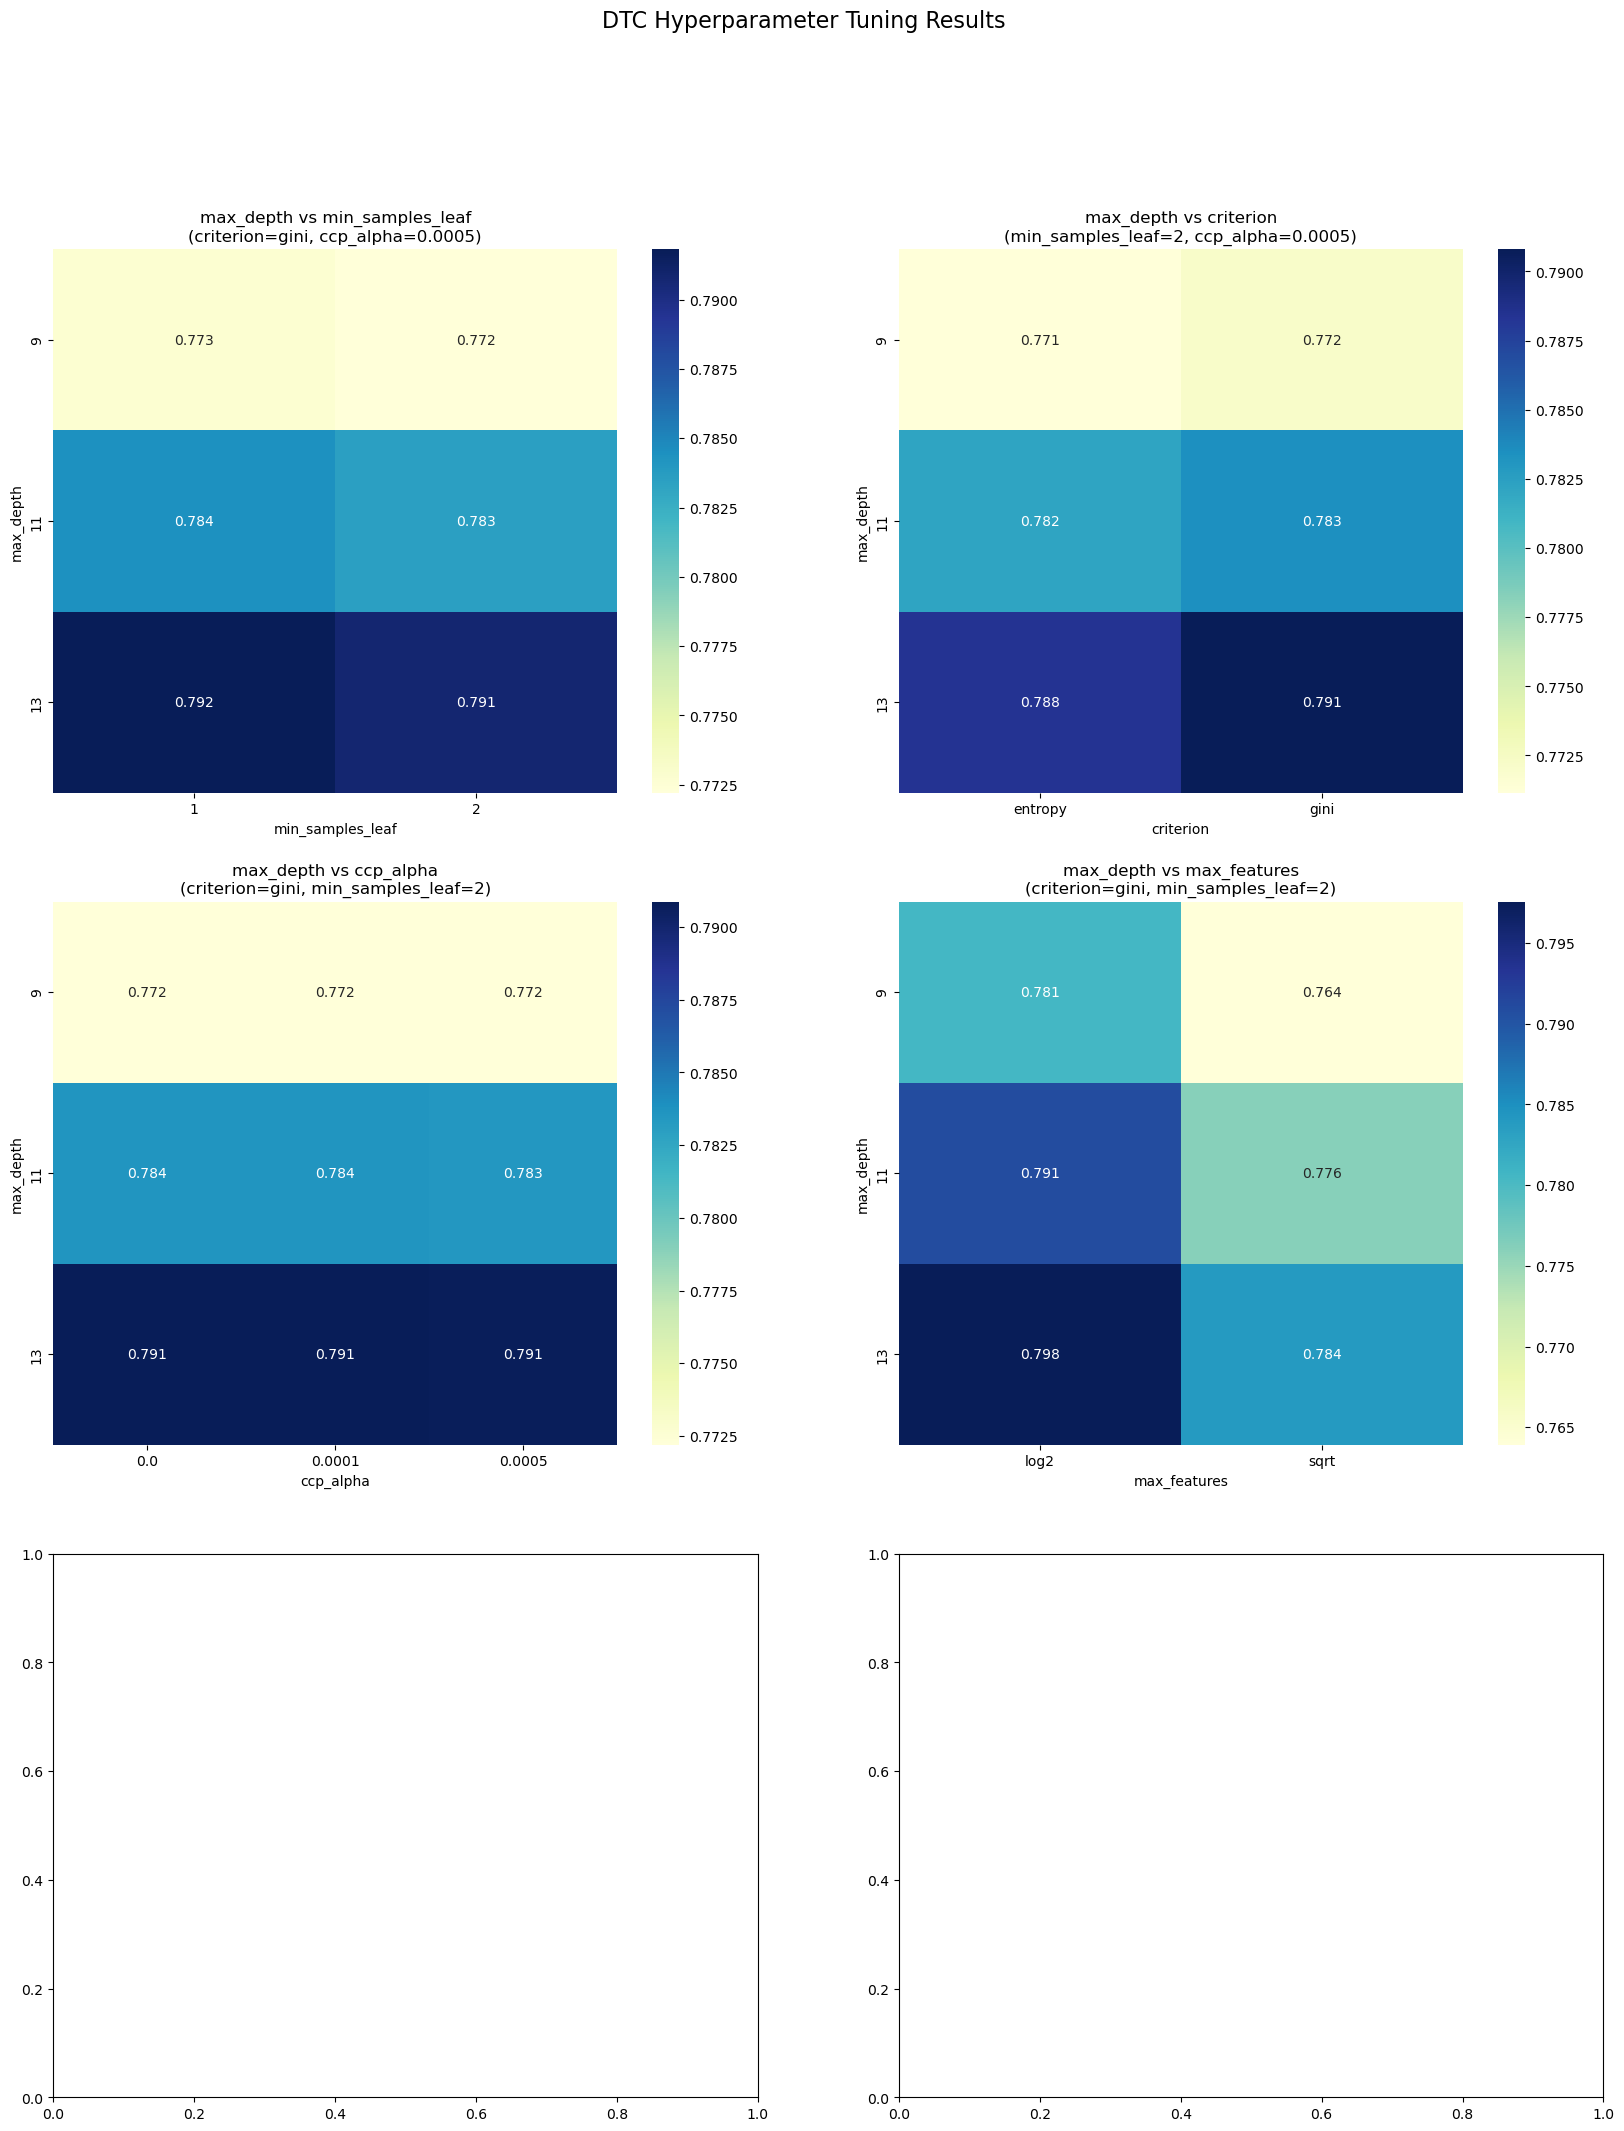

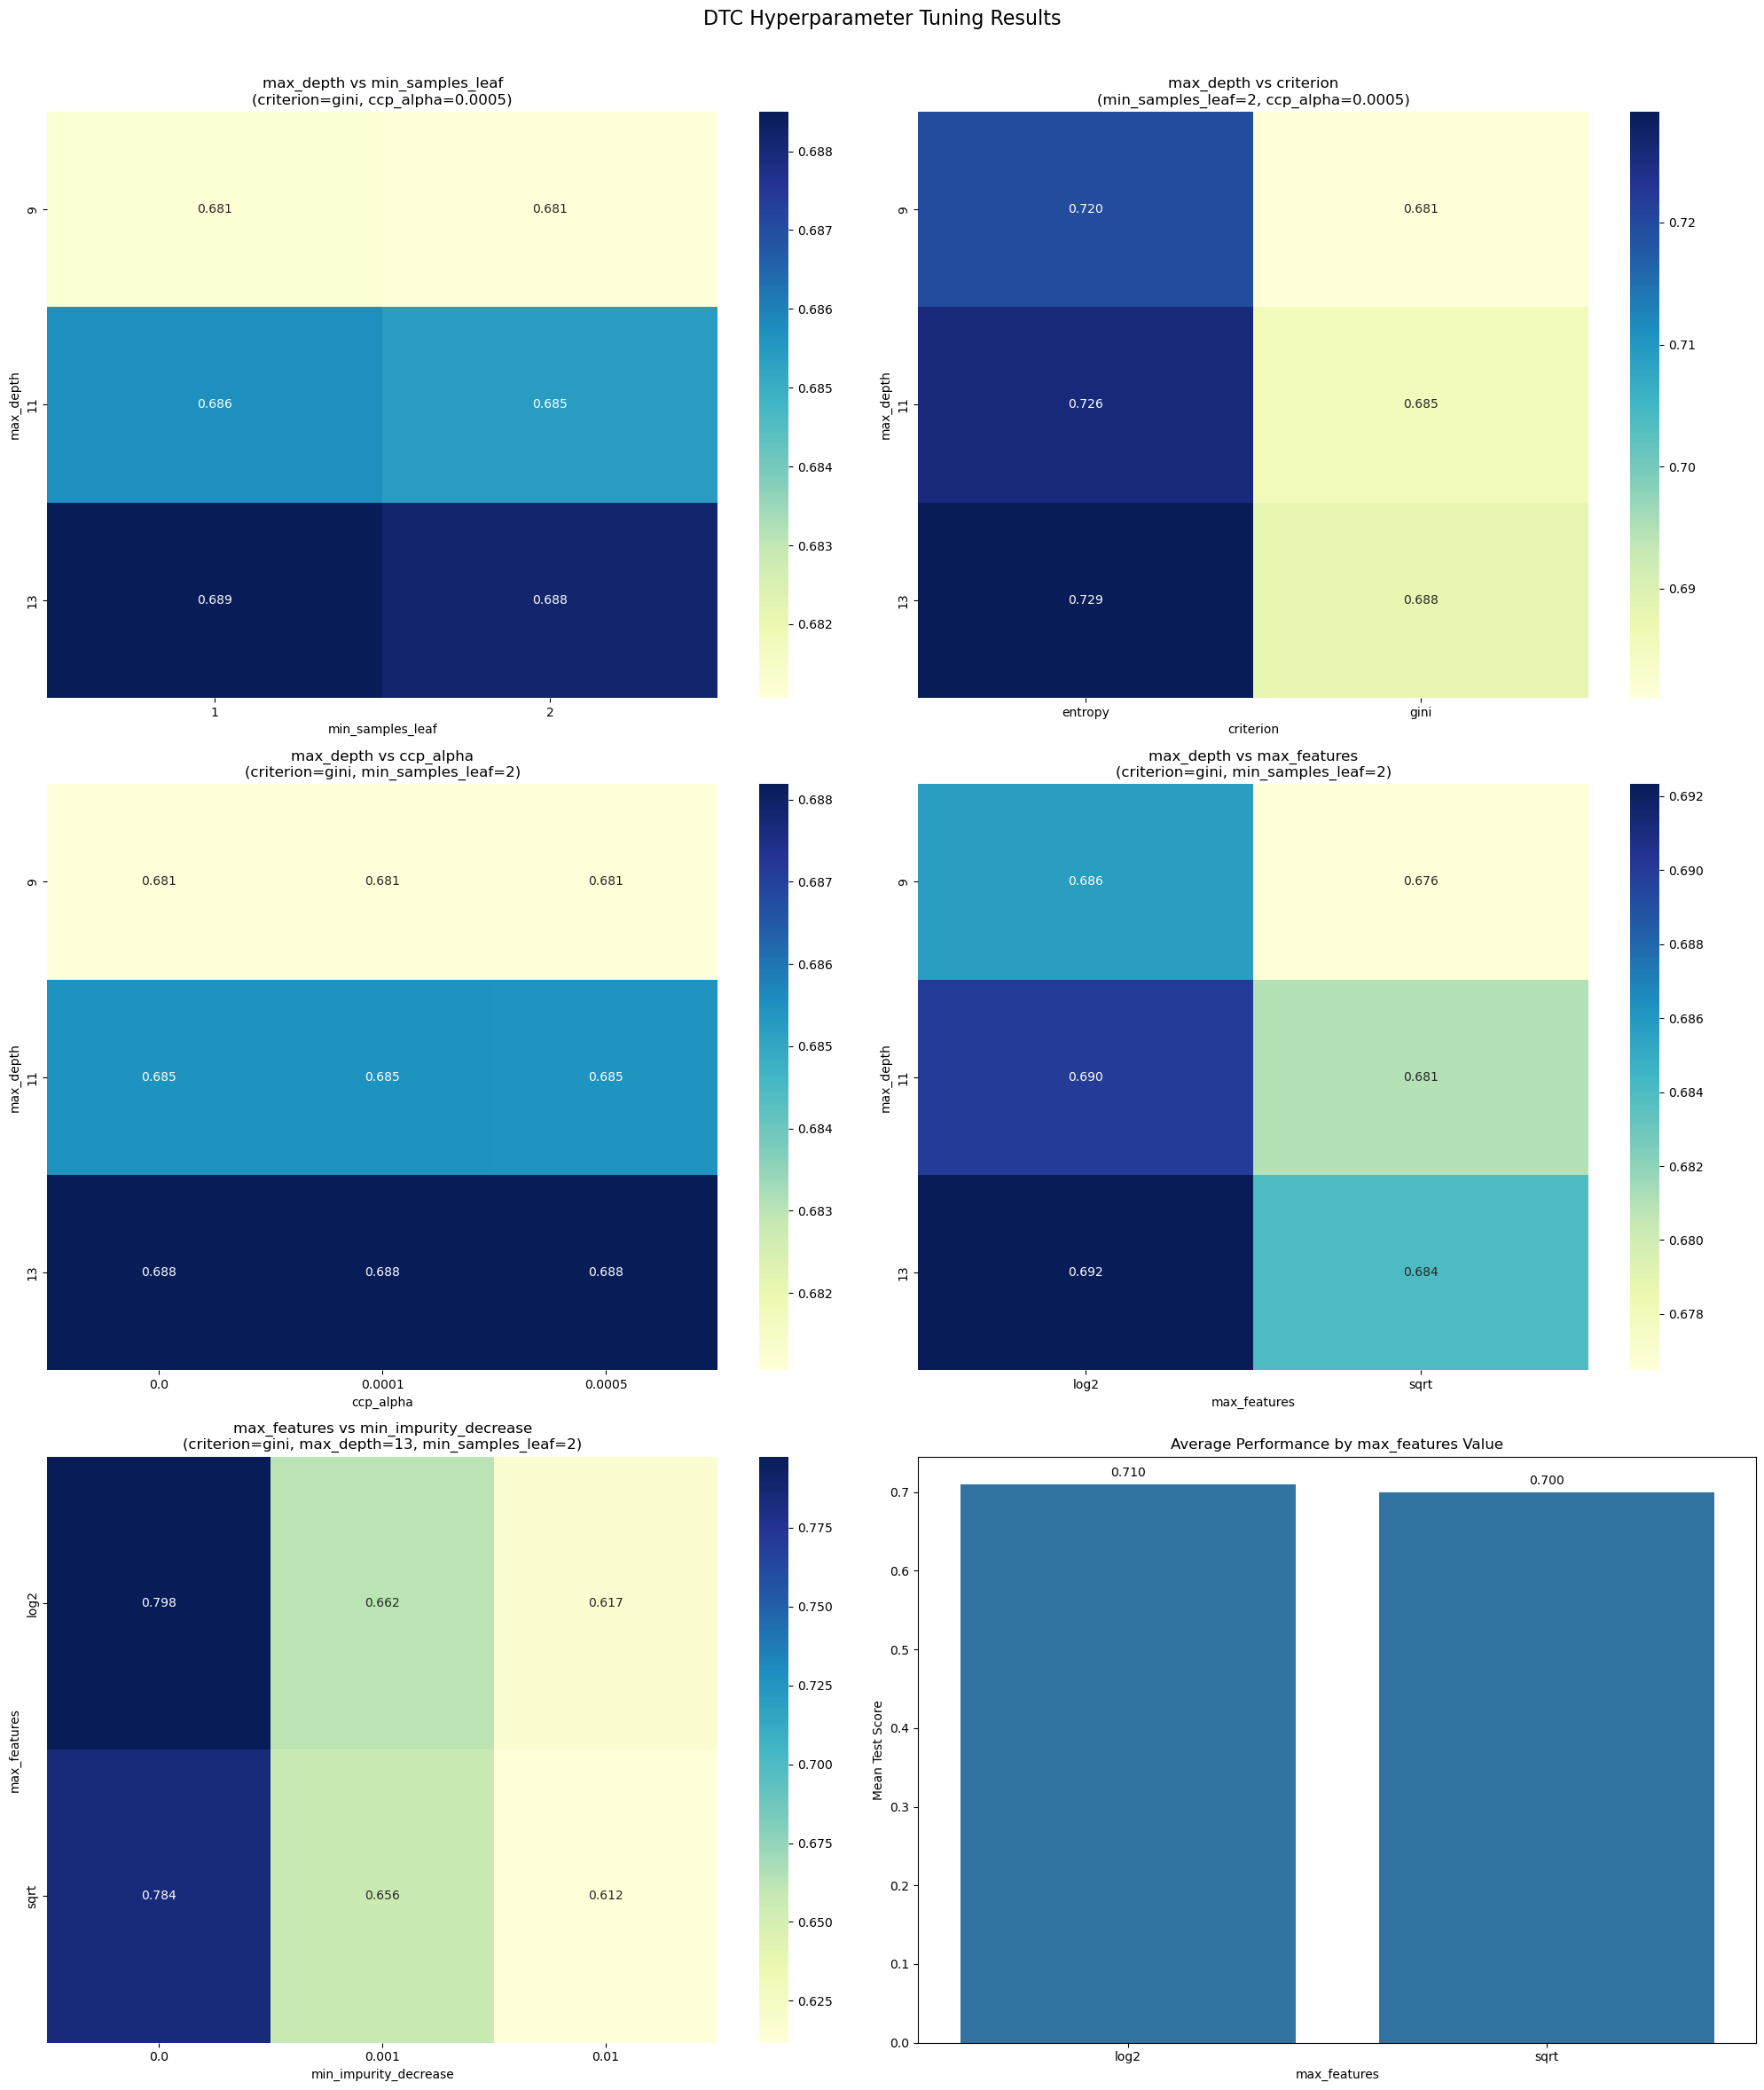

In [65]:
# Create a comprehensive visualization with multiple heatmaps of DTC hyperparameters tuning results
results_dtc_df = pd.DataFrame(dtc_grid_search.cv_results_)

# Set up a 3x2 grid of subplots to include all visualizations
fig, axes = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle('DTC Hyperparameter Tuning Results', fontsize=16)

# Function to safely create a heatmap, handling empty dataframes
def safe_heatmap(filtered_df, x_param, y_param, ax, title):
    if filtered_df.empty:
        ax.text(0.5, 0.5, f"No data for\n{title}", 
                ha='center', va='center', fontsize=12)
        ax.set_title(title)
        return
    
    pivot = filtered_df.pivot_table(
        values='mean_test_score',
        index=f'param_{y_param}',
        columns=f'param_{x_param}'
    )
    
    if pivot.empty or pivot.size == 0:
        ax.text(0.5, 0.5, f"No data for\n{title}", 
                ha='center', va='center', fontsize=12)
        ax.set_title(title)
        return
        
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap='YlGnBu', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_param)
    ax.set_ylabel(y_param)

# 1. max_depth vs min_samples_leaf
df_filtered1 = results_dtc_df[
    (results_dtc_df['param_criterion'] == 'gini') &
    (results_dtc_df['param_ccp_alpha'] == 0.0005)
]
safe_heatmap(
    df_filtered1, 
    'min_samples_leaf', 
    'max_depth', 
    axes[0, 0], 
    'max_depth vs min_samples_leaf\n(criterion=gini, ccp_alpha=0.0005)'
)

# 2. max_depth vs criterion
df_filtered2 = results_dtc_df[
    (results_dtc_df['param_min_samples_leaf'] == 2) &
    (results_dtc_df['param_ccp_alpha'] == 0.0005)
]
safe_heatmap(
    df_filtered2, 
    'criterion', 
    'max_depth', 
    axes[0, 1], 
    'max_depth vs criterion\n(min_samples_leaf=2, ccp_alpha=0.0005)'
)

# 3. max_depth vs ccp_alpha
df_filtered3 = results_dtc_df[
    (results_dtc_df['param_criterion'] == 'gini') &
    (results_dtc_df['param_min_samples_leaf'] == 2)
]
safe_heatmap(
    df_filtered3, 
    'ccp_alpha', 
    'max_depth', 
    axes[1, 0], 
    'max_depth vs ccp_alpha\n(criterion=gini, min_samples_leaf=2)'
)

# 4. max_depth vs max_features
df_filtered4 = results_dtc_df[
    (results_dtc_df['param_criterion'] == 'gini') &
    (results_dtc_df['param_min_samples_leaf'] == 2) &
    (results_dtc_df['param_ccp_alpha'] == 0.0005)
]
safe_heatmap(
    df_filtered4, 
    'max_features', 
    'max_depth', 
    axes[1, 1], 
    'max_depth vs max_features\n(criterion=gini, min_samples_leaf=2)'
)

# 5. max_features vs min_impurity_decrease heatmap
df_filtered5 = results_dtc_df[
    (results_dtc_df['param_criterion'] == 'gini') &
    (results_dtc_df['param_max_depth'] == 13) &
    (results_dtc_df['param_min_samples_leaf'] == 2)
]

if not df_filtered5.empty:
    pivot5 = df_filtered5.pivot_table(
        values='mean_test_score',
        index='param_max_features',
        columns='param_min_impurity_decrease'
    )
    
    if not pivot5.empty and pivot5.size > 0:
        sns.heatmap(pivot5, annot=True, fmt=".3f", cmap='YlGnBu', ax=axes[2, 0])
        axes[2, 0].set_title('max_features vs min_impurity_decrease\n(criterion=gini, max_depth=13, min_samples_leaf=2)')
        axes[2, 0].set_xlabel('min_impurity_decrease')
        axes[2, 0].set_ylabel('max_features')
    else:
        axes[2, 0].text(0.5, 0.5, "No data available for\nmax_features vs min_impurity_decrease heatmap", 
                    ha='center', va='center', fontsize=12)
        axes[2, 0].set_title('max_features vs min_impurity_decrease')
else:
    axes[2, 0].text(0.5, 0.5, "No data available for\nmax_features vs min_impurity_decrease heatmap", 
                ha='center', va='center', fontsize=12)
    axes[2, 0].set_title('max_features vs min_impurity_decrease')

# 6. Bar chart of max_features performance
max_features_scores = results_dtc_df.groupby('param_max_features')['mean_test_score'].mean()
sns.barplot(x=max_features_scores.index, y=max_features_scores.values, ax=axes[2, 1])
axes[2, 1].set_title('Average Performance by max_features Value')
axes[2, 1].set_xlabel('max_features')
axes[2, 1].set_ylabel('Mean Test Score')
for i, v in enumerate(max_features_scores.values):
    axes[2, 1].text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

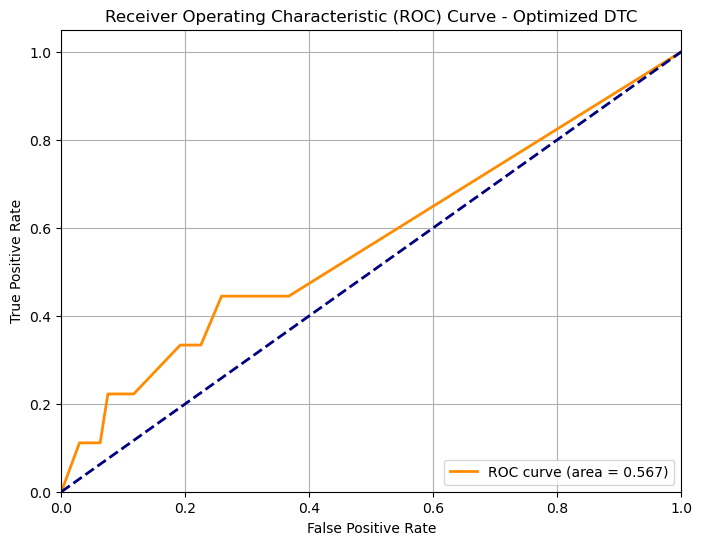

In [66]:
# Plot ROC curve for the optimized DTC model
plot_roc_curve(y_vald, dtc_best_model, "DTC")

|--- nbumps3 <= 0.00
|   |--- nbumps2 <= 1.02
|   |   |--- gdpuls <= -0.47
|   |   |   |--- energy <= 0.15
|   |   |   |   |--- maxenergy <= 0.03
|   |   |   |   |   |--- gdenergy <= -0.08
|   |   |   |   |   |   |--- gdpuls <= -0.49
|   |   |   |   |   |   |   |--- gdpuls <= -0.73
|   |   |   |   |   |   |   |   |--- gdenergy <= -0.80
|   |   |   |   |   |   |   |   |   |--- gdenergy <= -0.81
|   |   |   |   |   |   |   |   |   |   |--- gdenergy <= -0.93
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- gdenergy >  -0.93
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- gdenergy >  -0.81
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- gdenergy >  -0.80
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- gdpuls >  -0.73
|   |   |   |   |   |   |   |   |--- gdpuls <= -0.72
|   |   |   |   |   | 

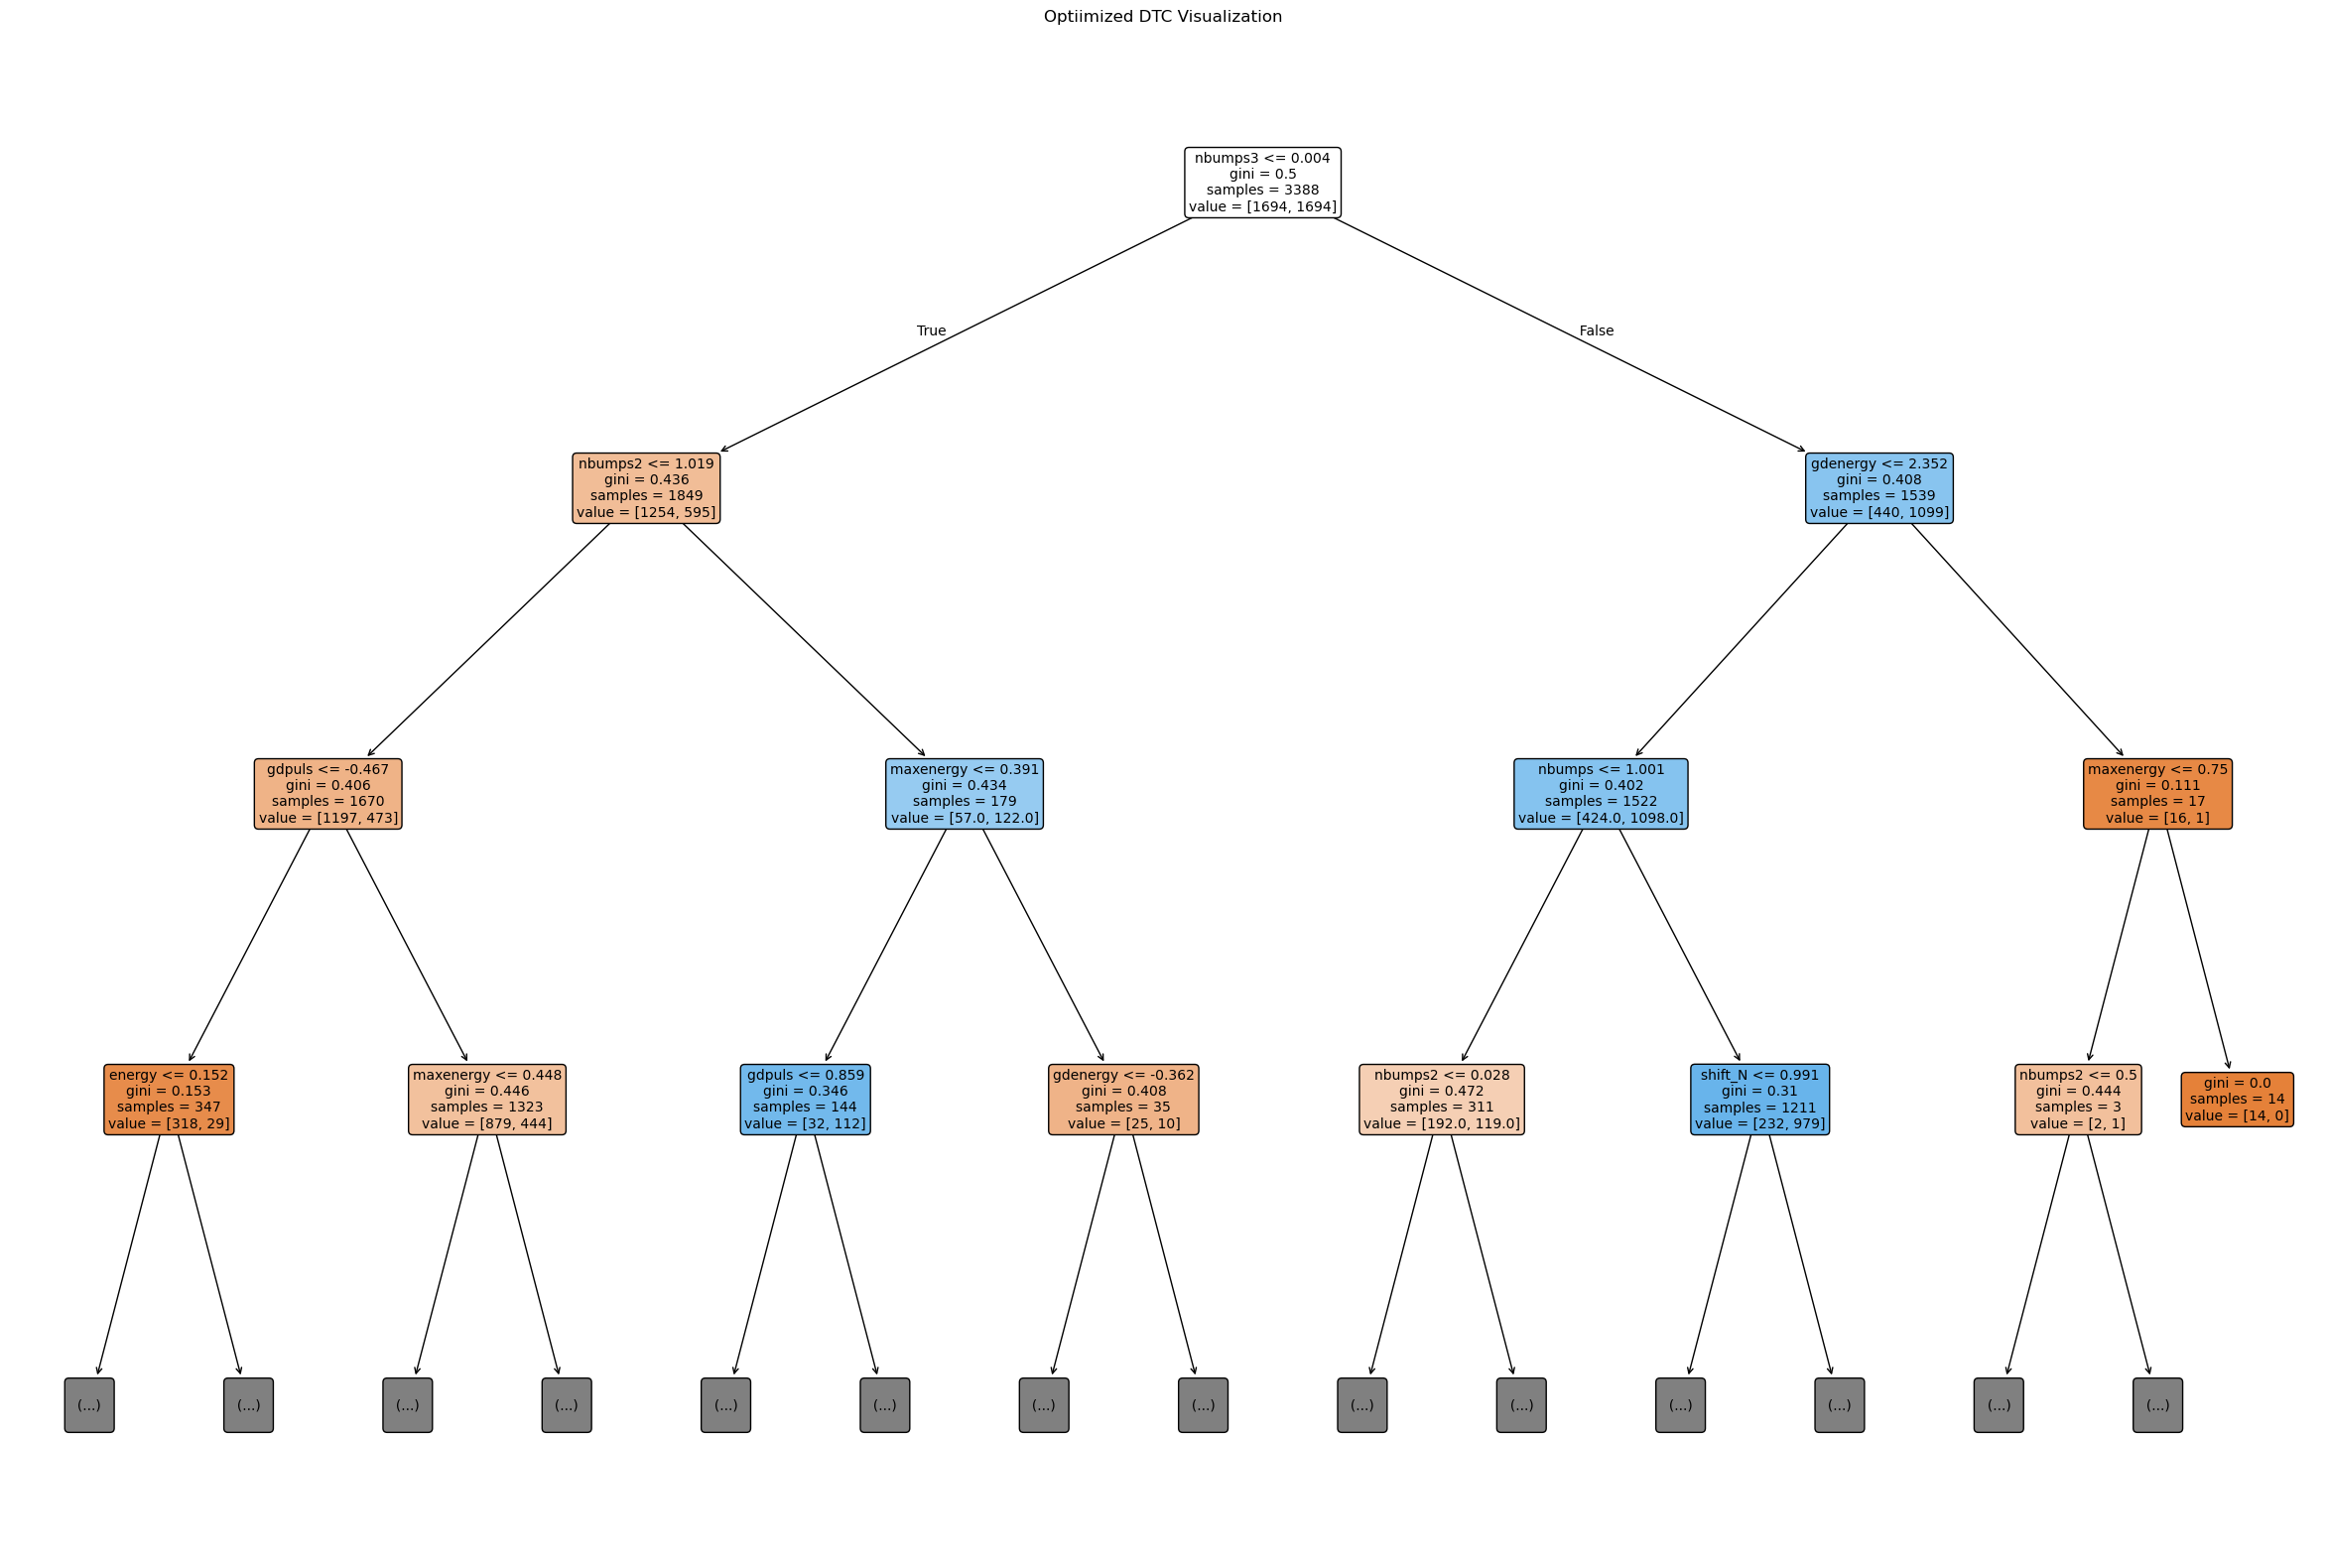

In [67]:
# Print the tree as text
print(export_text(dtc_best_model, feature_names=list(X_train_df.columns)))

# Plot the tree
plt.figure(figsize=(30, 20))
plot_tree(dtc_best_model, feature_names=list(X_train_df.columns), filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Optiimized DTC Visualization")
plt.show()

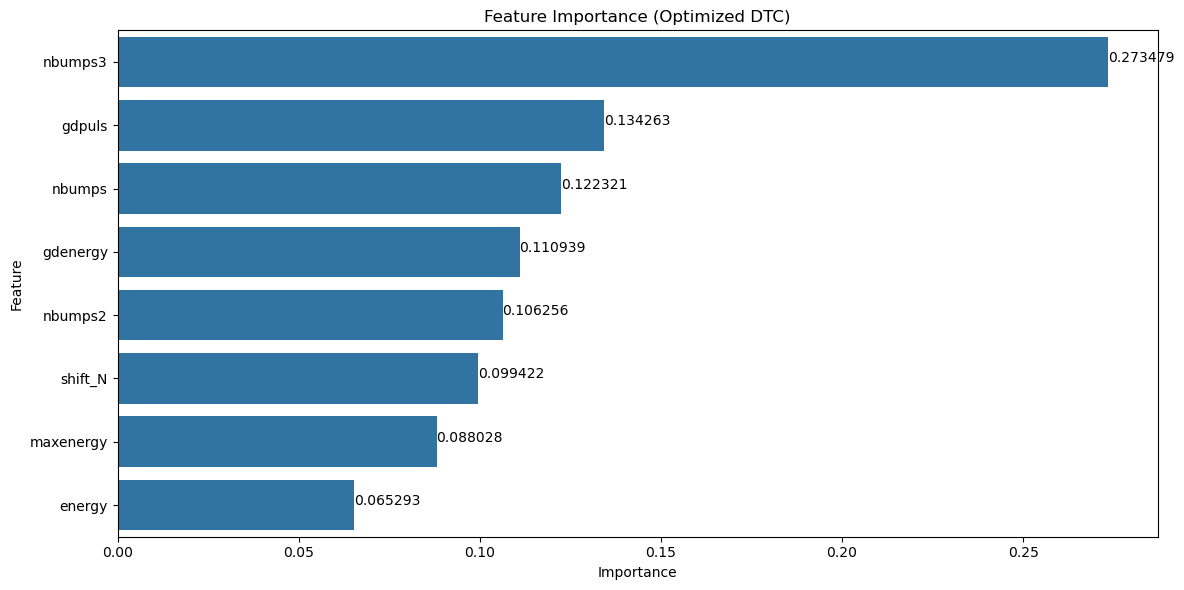

In [68]:
# Label the features with their importance scores
feature_importances = pd.DataFrame({
    "feature": selected_features,
    "importance": dtc_best_model.feature_importances_
})
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Label the bar with value
plt.figure(figsize=(12, max(6, len(feature_importances) * 0.3)))  # dynamic height
sns.barplot(x="importance", y="feature", data=feature_importances)
for index, value in enumerate(feature_importances['importance']):
    plt.text(value, index, str(round(value, 6)))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Optimized DTC)")
plt.tight_layout()
plt.show()


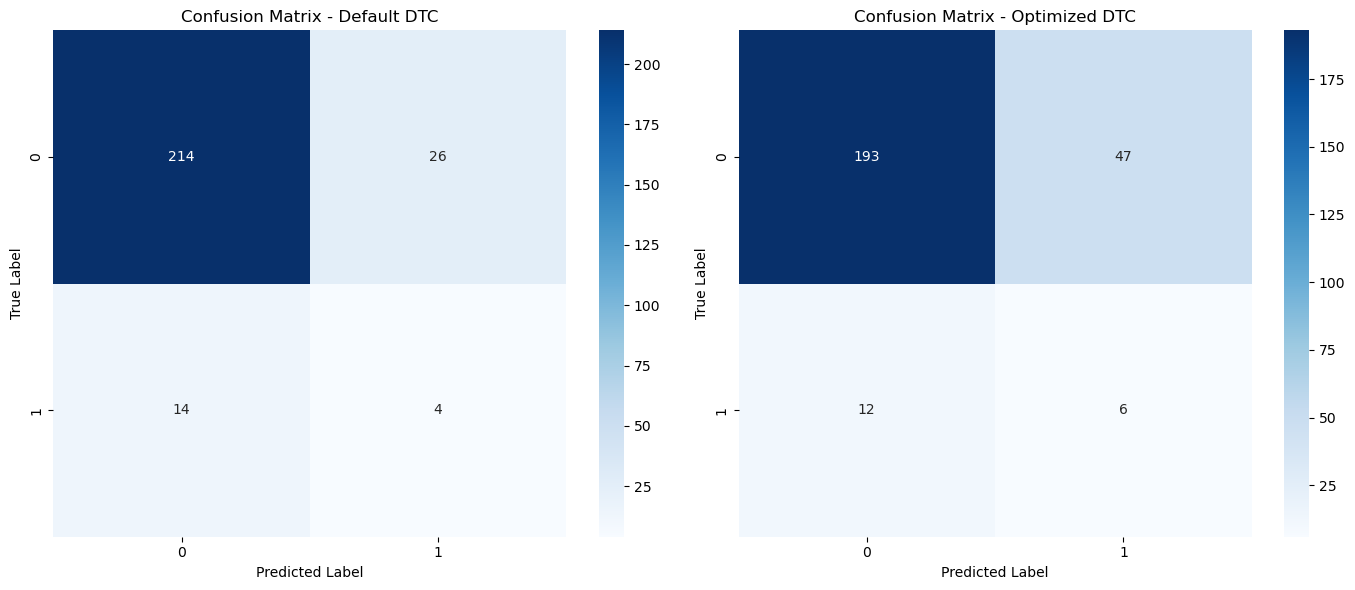

In [69]:
plot_confusion_matrices_side_by_side(y_vald, y_dtc_default_model_pred_val, y_dtc_best_pred_val, "DTC")

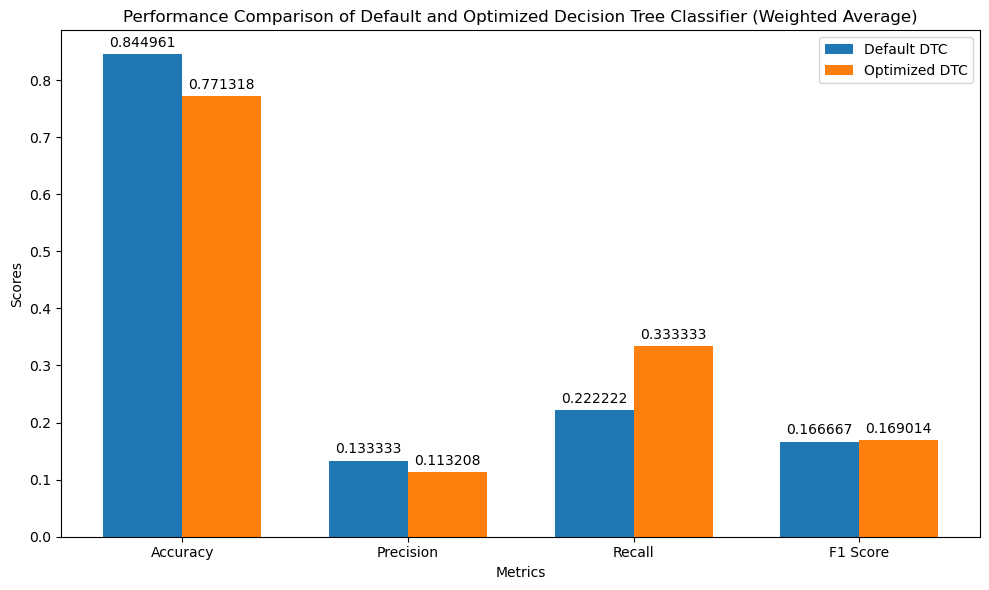

In [70]:
plot_model_comparison(y_vald, y_dtc_default_model_pred_val, y_dtc_best_pred_val, "Decision Tree Classifier", "DTC")

##### K-Nearest Neighbour (KNN) 

An instance of KNN Classifier with default parameters

In [71]:
# Initialize the K-Nearest Neighbors Classifier
knn_default_model = KNeighborsClassifier()

# Fit the K-Nearest Neighbors Classifier on the training set
knn_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_knn_default_model_pred_val = knn_default_model.predict(X_vald)

# Print the default parameters of the K-Nearest Neighbors Classifier
print("Default parameters of K-Nearest Neighbors Classifier: \n", knn_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_knn_default_model_pred_val)

Default parameters of K-Nearest Neighbors Classifier: 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.748062
Validation set precision: 0.087719
Validation set recall: 0.277778
Validation set f1 score: 0.133333

Validation set confusion matrix: 
 [[188  52]
 [ 13   5]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       240
           1       0.09      0.28      0.13        18

    accuracy                           0.75       258
   macro avg       0.51      0.53      0.49       258
weighted avg       0.88      0.75      0.80       258



Hyperparameter tuning using GridSearchCV for KNN Classifier

In [72]:
# Set the hyperparameter grid for the K-Nearest Neighbor Classifier
# {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
knn_param_grid = {
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 50, 5),
    "metric": ["euclidean", "manhattan", "minkowski"],
    "n_neighbors": range(3, 30, 2),
    "weights": ["uniform", "distance"],
}

# Initialize the base K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=knn,
    param_grid=knn_param_grid,
    scoring="recall_macro", # Choose to refit the base model based on recall score
    cv=cv, # Repeated Stratified K-Fold Cross Validation
    verbose=2,
    n_jobs=-1,
    error_score=0,
)

# Fit the grid search to training data
knn_grid_results = knn_grid_search.fit(X_train, y_train)

# Output best parameters and score
print(f"✅ Best hyperparameters found: {knn_grid_results.best_params_}")
print(f"✅ Best cross-validation score: {knn_grid_results.best_score_:.6f}")

# Get the best model
knn_best_model = knn_grid_results.best_estimator_

# Make predictions on the validation set
y_knn_best_pred_val = knn_best_model.predict(X_vald)

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_knn_best_pred_val)


Fitting 25 folds for each of 2016 candidates, totalling 50400 fits
✅ Best hyperparameters found: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
✅ Best cross-validation score: 0.865112


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.771318
Validation set precision: 0.081633
Validation set recall: 0.222222
Validation set f1 score: 0.119403

Validation set confusion matrix: 
 [[195  45]
 [ 14   4]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       240
           1       0.08      0.22      0.12        18

    accuracy                           0.77       258
   macro avg       0.51      0.52      0.49       258
weighted avg       0.87      0.77      0.82       258



In [73]:
# Convert the results of the GridSearchCV into a DataFrame
# Sort the DataFrame by the mean test score in descending order
# Display the top 10 configurations with the highest mean test scores
results_knn_df = pd.DataFrame(knn_grid_search.cv_results_)
results_knn_df.sort_values(
    by=['rank_test_score', 'mean_test_score'], 
    ascending=[True, False]
).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,...,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score
29,0.010821,0.009569,0.014747,0.011289,auto,10,manhattan,3,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",...,0.847939,0.852224,0.868732,0.873156,0.843658,0.871559,0.872899,0.865112,0.010821,1
113,0.005622,0.001061,0.009342,0.001309,auto,15,manhattan,3,distance,"{'algorithm': 'auto', 'leaf_size': 15, 'metric...",...,0.847939,0.852224,0.868732,0.873156,0.843658,0.871559,0.872899,0.865112,0.010821,1
197,0.006581,0.002224,0.010134,0.003327,auto,20,manhattan,3,distance,"{'algorithm': 'auto', 'leaf_size': 20, 'metric...",...,0.847939,0.852224,0.868732,0.873156,0.843658,0.871559,0.872899,0.865112,0.010821,1
281,0.006063,0.003426,0.011578,0.007502,auto,25,manhattan,3,distance,"{'algorithm': 'auto', 'leaf_size': 25, 'metric...",...,0.847939,0.852224,0.868732,0.873156,0.843658,0.871559,0.872899,0.865112,0.010821,1
365,0.004989,0.001393,0.009714,0.002205,auto,30,manhattan,3,distance,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",...,0.847939,0.852224,0.868732,0.873156,0.843658,0.871559,0.872899,0.865112,0.010821,1
449,0.007510,0.009789,0.011111,0.005388,auto,35,manhattan,3,distance,"{'algorithm': 'auto', 'leaf_size': 35, 'metric...",...,0.847939,0.852224,0.868732,0.873156,0.843658,0.871559,0.872899,0.865112,0.010821,1
533,0.005743,0.001494,0.010575,0.002147,auto,40,manhattan,3,distance,"{'algorithm': 'auto', 'leaf_size': 40, 'metric...",...,0.847939,0.852224,0.868732,0.873156,0.843658,0.871559,0.872899,0.865112,0.010821,1
617,0.004324,0.000667,0.010966,0.003176,auto,45,manhattan,3,distance,"{'algorithm': 'auto', 'leaf_size': 45, 'metric...",...,0.847939,0.852224,0.868732,0.873156,0.843658,0.871559,0.872899,0.865112,0.010821,1
701,0.004877,0.001591,0.016089,0.004150,ball_tree,10,manhattan,3,distance,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'm...",...,0.847939,0.852224,0.868732,0.873156,0.843658,0.871559,0.872899,0.865112,0.010821,1
785,0.006154,0.008884,0.028335,0.020628,ball_tree,15,manhattan,3,distance,"{'algorithm': 'ball_tree', 'leaf_size': 15, 'm...",...,0.847939,0.852224,0.868732,0.873156,0.843658,0.871559,0.872899,0.865112,0.010821,1


In [74]:
results_knn_df[['params', 'mean_test_score', 'rank_test_score']].sort_values(
    by=['rank_test_score', 'mean_test_score'],
    ascending=[True, False]
).head(10)

,params,mean_test_score,rank_test_score
29,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",0.865112,1
113,"{'algorithm': 'auto', 'leaf_size': 15, 'metric...",0.865112,1
197,"{'algorithm': 'auto', 'leaf_size': 20, 'metric...",0.865112,1
281,"{'algorithm': 'auto', 'leaf_size': 25, 'metric...",0.865112,1
365,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.865112,1
449,"{'algorithm': 'auto', 'leaf_size': 35, 'metric...",0.865112,1
533,"{'algorithm': 'auto', 'leaf_size': 40, 'metric...",0.865112,1
617,"{'algorithm': 'auto', 'leaf_size': 45, 'metric...",0.865112,1
701,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'm...",0.865112,1
785,"{'algorithm': 'ball_tree', 'leaf_size': 15, 'm...",0.865112,1


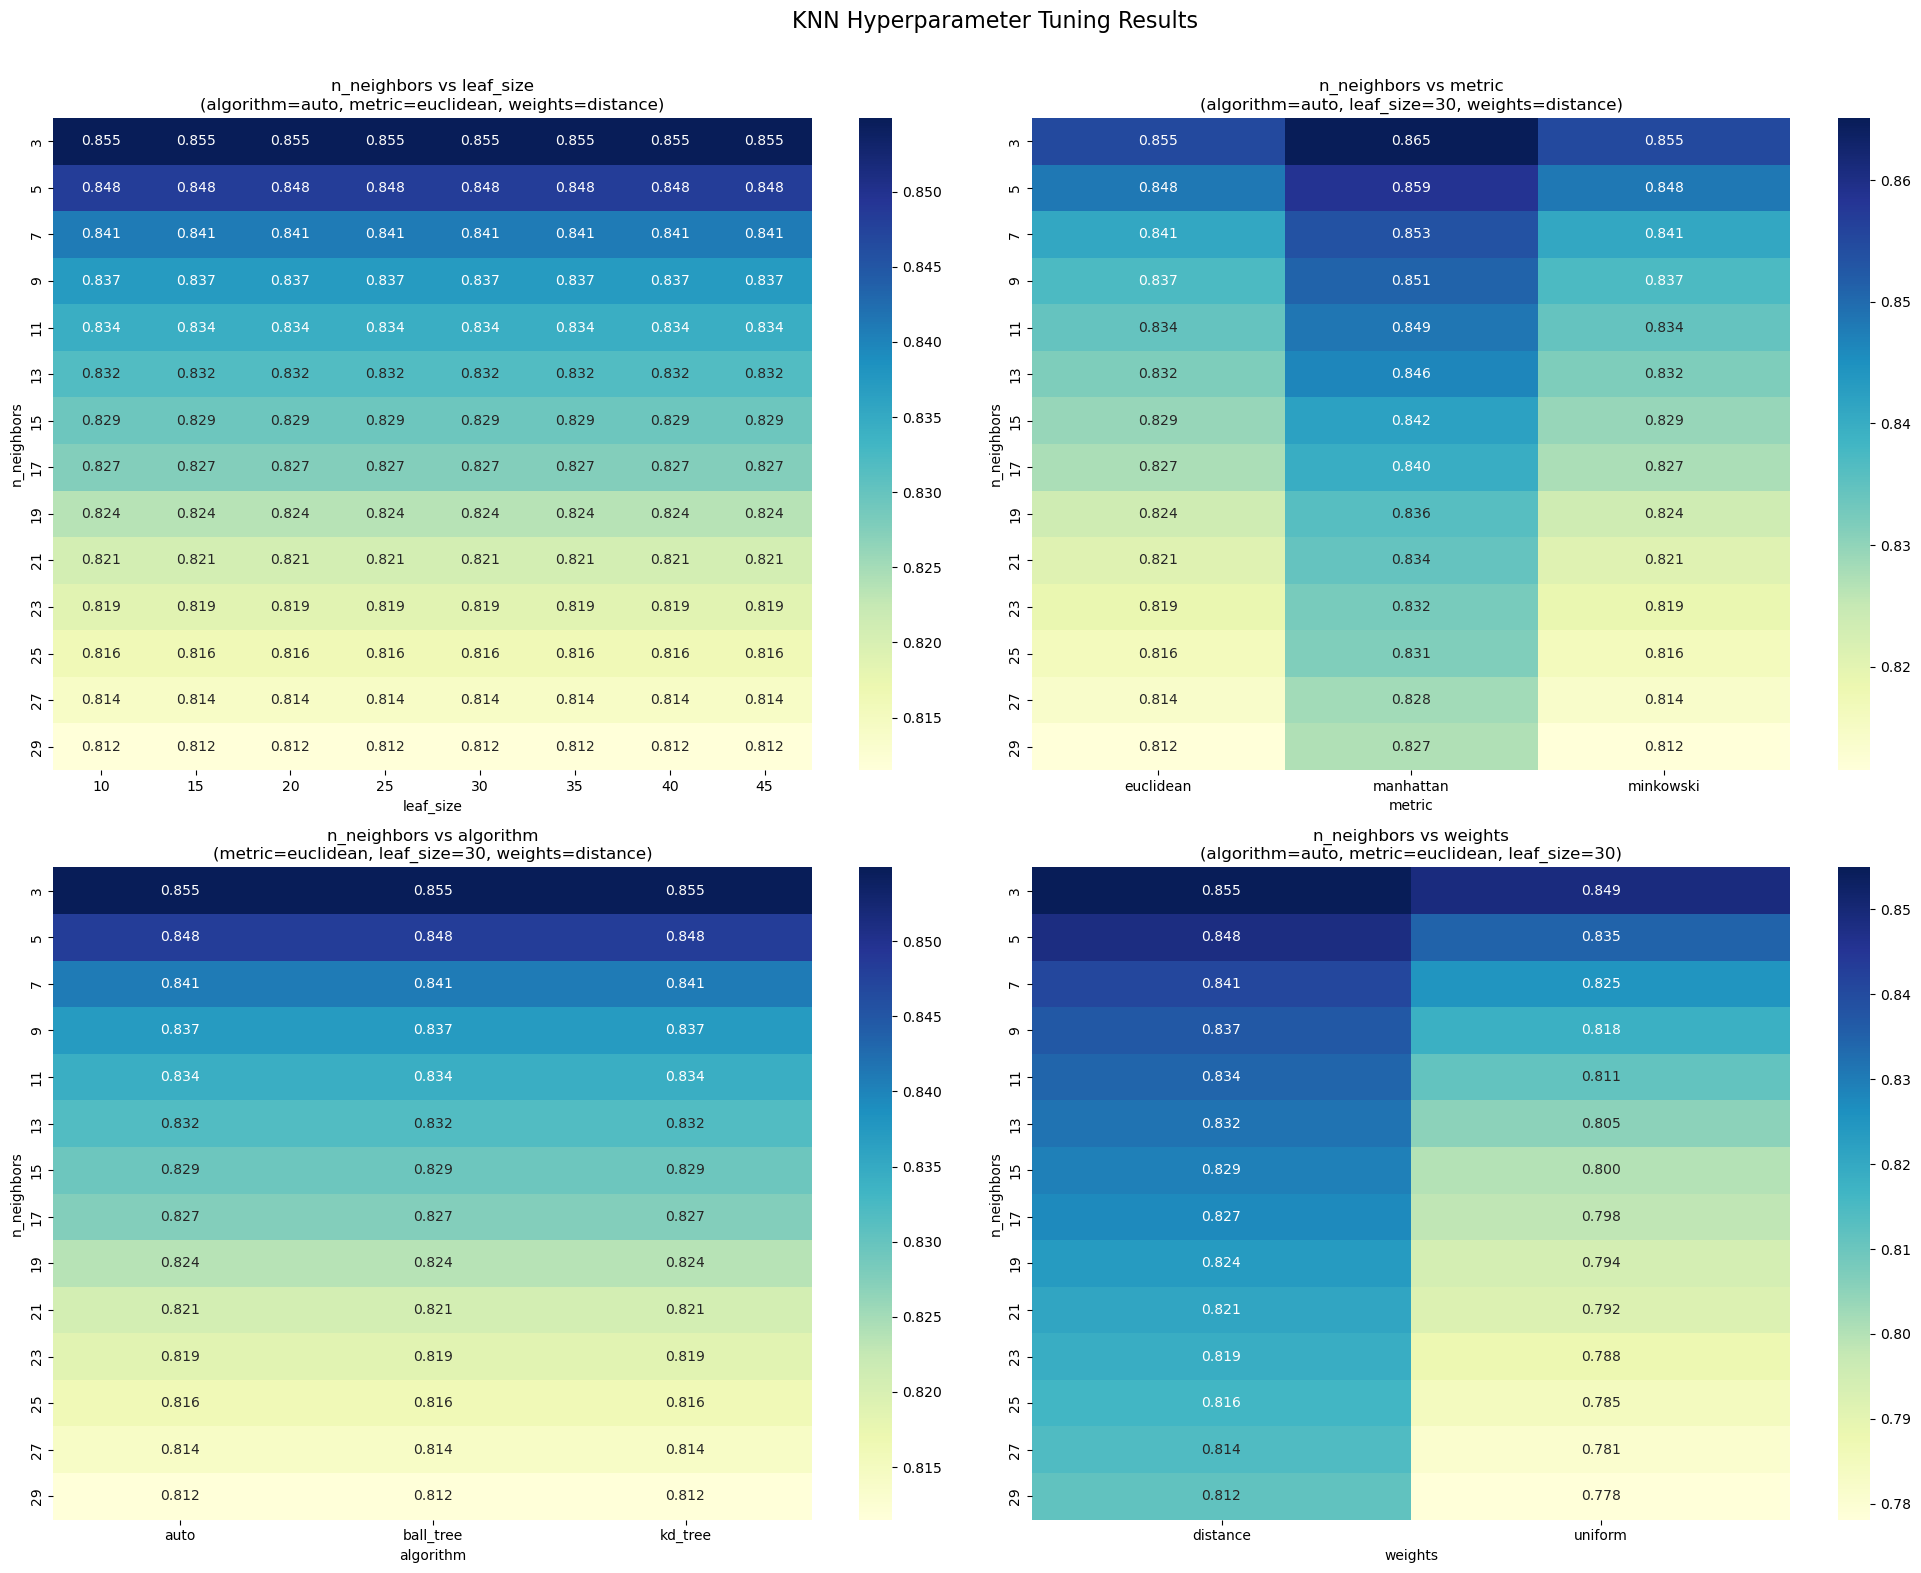

In [75]:
# Create a comprehensive visualization with multiple heatmaps of KNN hyperparameters tuning results
results_knn_df = pd.DataFrame(knn_grid_search.cv_results_)

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('KNN Hyperparameter Tuning Results', fontsize=16)

# 1. n_neighbors vs leaf_size (for auto algorithm, euclidean metric, distance weights)
df_filtered1 = results_knn_df[
    (results_knn_df['param_algorithm'] == 'auto') &
    (results_knn_df['param_metric'] == 'euclidean') &
    (results_knn_df['param_weights'] == 'distance')
]
pivot1 = df_filtered1.pivot_table(
    values='mean_test_score',
    index='param_n_neighbors',
    columns='param_leaf_size'
)
sns.heatmap(pivot1, annot=True, fmt=".3f", cmap='YlGnBu', ax=axes[0, 0])
axes[0, 0].set_title('n_neighbors vs leaf_size\n(algorithm=auto, metric=euclidean, weights=distance)')
axes[0, 0].set_xlabel('leaf_size')
axes[0, 0].set_ylabel('n_neighbors')

# 2. n_neighbors vs metric (for auto algorithm, leaf_size=30, distance weights)
df_filtered2 = results_knn_df[
    (results_knn_df['param_algorithm'] == 'auto') &
    (results_knn_df['param_leaf_size'] == 30) &
    (results_knn_df['param_weights'] == 'distance')
]
pivot2 = df_filtered2.pivot_table(
    values='mean_test_score',
    index='param_n_neighbors',
    columns='param_metric'
)
sns.heatmap(pivot2, annot=True, fmt=".3f", cmap='YlGnBu', ax=axes[0, 1])
axes[0, 1].set_title('n_neighbors vs metric\n(algorithm=auto, leaf_size=30, weights=distance)')
axes[0, 1].set_xlabel('metric')
axes[0, 1].set_ylabel('n_neighbors')

# 3. n_neighbors vs algorithm (for euclidean metric, leaf_size=30, distance weights)
df_filtered3 = results_knn_df[
    (results_knn_df['param_metric'] == 'euclidean') &
    (results_knn_df['param_leaf_size'] == 30) &
    (results_knn_df['param_weights'] == 'distance')
]
pivot3 = df_filtered3.pivot_table(
    values='mean_test_score',
    index='param_n_neighbors',
    columns='param_algorithm'
)
sns.heatmap(pivot3, annot=True, fmt=".3f", cmap='YlGnBu', ax=axes[1, 0])
axes[1, 0].set_title('n_neighbors vs algorithm\n(metric=euclidean, leaf_size=30, weights=distance)')
axes[1, 0].set_xlabel('algorithm')
axes[1, 0].set_ylabel('n_neighbors')

# 4. n_neighbors vs weights (for auto algorithm, euclidean metric, leaf_size=30)
df_filtered4 = results_knn_df[
    (results_knn_df['param_algorithm'] == 'auto') &
    (results_knn_df['param_metric'] == 'euclidean') &
    (results_knn_df['param_leaf_size'] == 30)
]
pivot4 = df_filtered4.pivot_table(
    values='mean_test_score',
    index='param_n_neighbors',
    columns='param_weights'
)
sns.heatmap(pivot4, annot=True, fmt=".3f", cmap='YlGnBu', ax=axes[1, 1])
axes[1, 1].set_title('n_neighbors vs weights\n(algorithm=auto, metric=euclidean, leaf_size=30)')
axes[1, 1].set_xlabel('weights')
axes[1, 1].set_ylabel('n_neighbors')

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to make room for suptitle
plt.show()

**Principal Component Analysis (PCA)** transforms the original features into a new set of uncorrelated components, which are linear combinations of the original variables. These components are ordered based on the amount of variance they capture from the data. PCA reduces dimensionality while preserving as much of the underlying data structure as possible.

In this case, PCA is applied to reduce the original eight-dimensional feature space to two principal components, specifically for visualization and plotting purposes.

In [76]:
# Apply PCA to validation features
# Reduced to 2D for visualization
pca = PCA(n_components=2)

# Fit PCA on the validation set
X_pca = pca.fit_transform(X_vald)

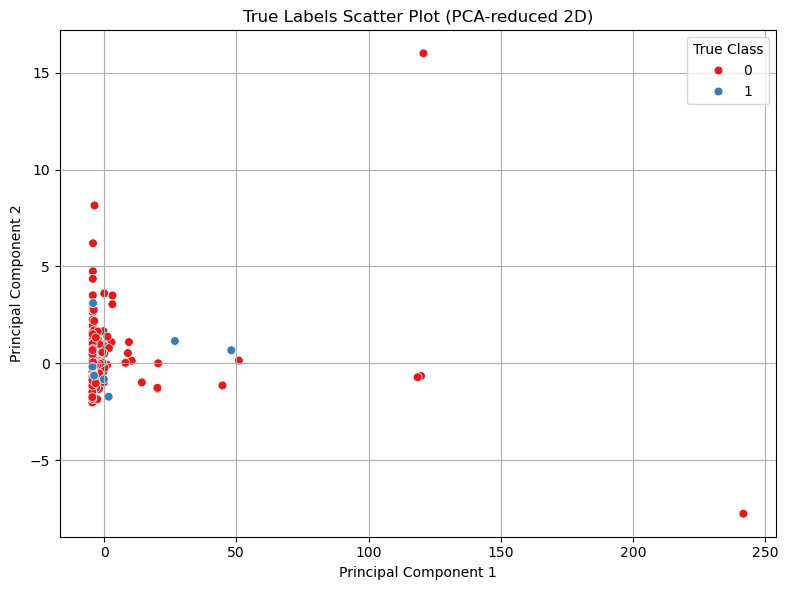

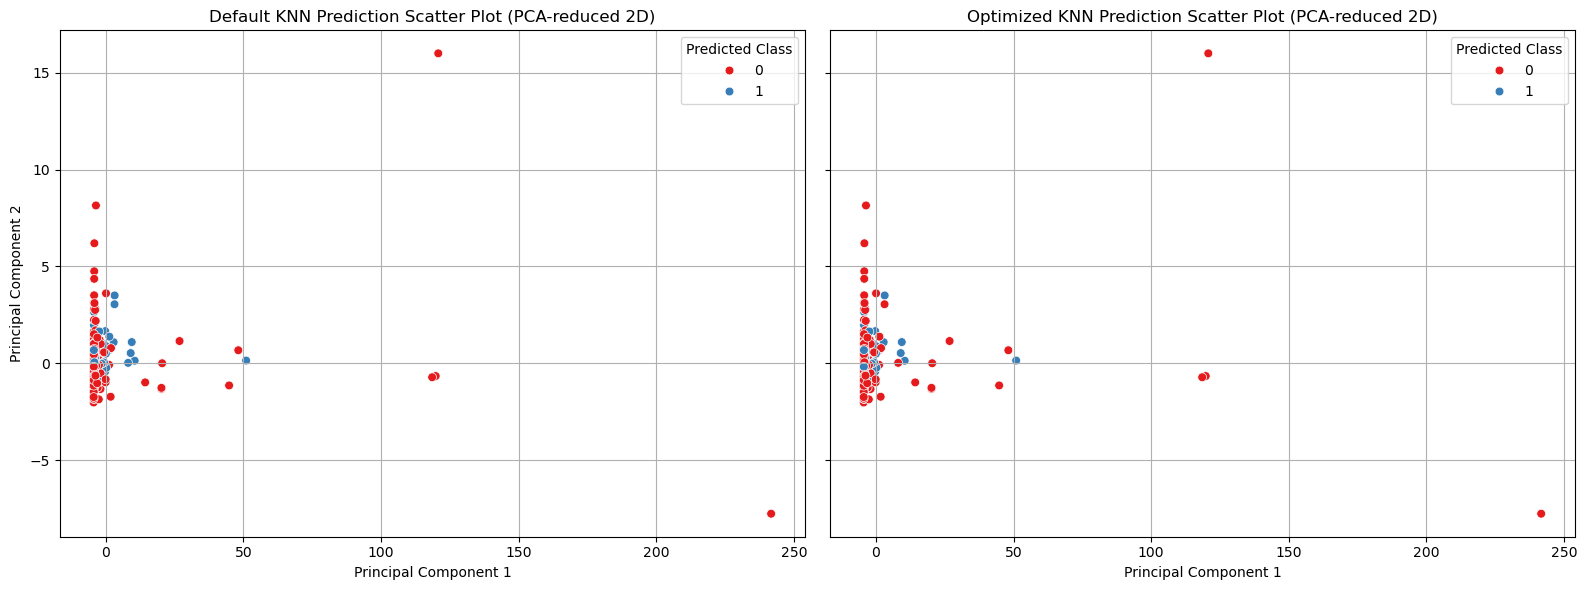

In [77]:
# Plot the true labels in a separate graph
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_vald, palette='Set1', s=40)
plt.title("True Labels Scatter Plot (PCA-reduced 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="True Class")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# Default KNN
sns.scatterplot(ax=axes[0], x=X_pca[:, 0], y=X_pca[:, 1], hue=y_knn_default_model_pred_val, palette='Set1', s=40)
axes[0].set_title("Default KNN Prediction Scatter Plot (PCA-reduced 2D)")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].legend(title="Predicted Class")
axes[0].grid(True)

# Optimized KNN
sns.scatterplot(ax=axes[1], x=X_pca[:, 0], y=X_pca[:, 1], hue=y_knn_best_pred_val, palette='Set1', s=40)
axes[1].set_title("Optimized KNN Prediction Scatter Plot (PCA-reduced 2D)")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].legend(title="Predicted Class")
axes[1].grid(True)

plt.tight_layout()
plt.show()

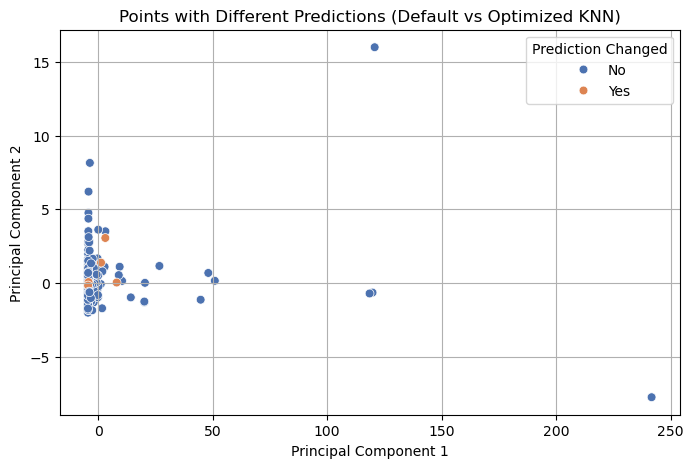

In [78]:
# Compare predictions
y_pred_default = knn_default_model.predict(X_vald)
y_pred_optimized = knn_best_model.predict(X_vald)

# Identify points where predictions differ
diff_mask = y_pred_default != y_pred_optimized
diff_labels = pd.Series(diff_mask).map({True: 'Yes', False: 'No'})

# PCA transform
X_pca = PCA(n_components=2).fit_transform(X_vald)

# Plot only the changed predictions
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=diff_labels, palette='deep', s=40)
plt.title("Points with Different Predictions (Default vs Optimized KNN)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Prediction Changed")
plt.grid(True)
plt.show()

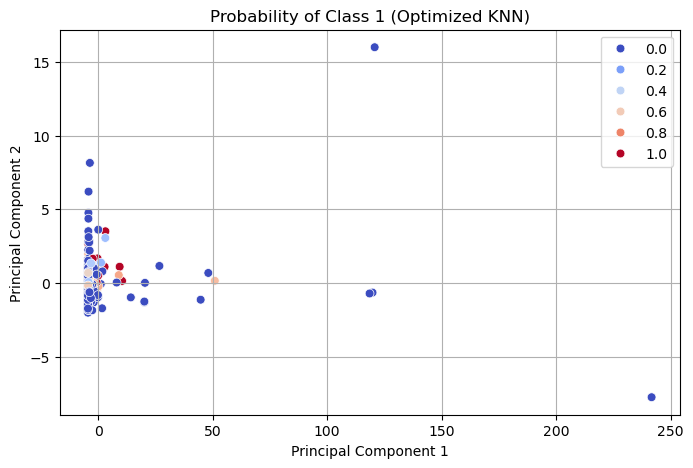

In [79]:
probs = knn_best_model.predict_proba(X_vald)[:, 1]
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=probs, palette='coolwarm', s=40)
plt.title("Probability of Class 1 (Optimized KNN)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

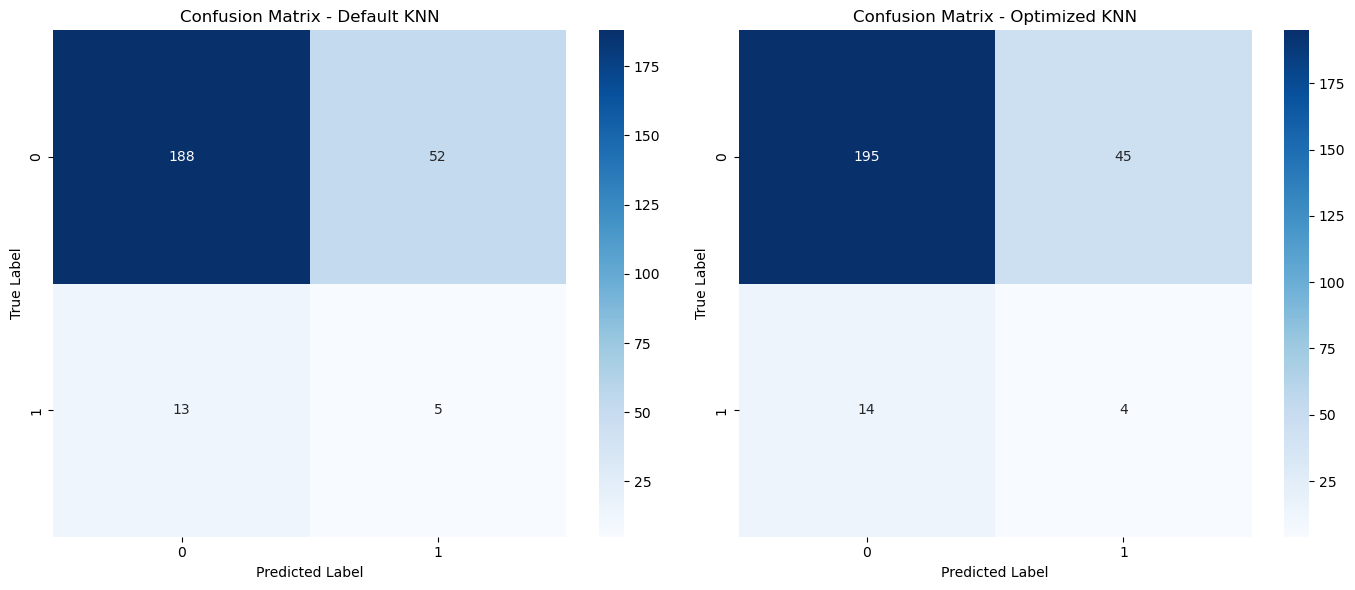

In [80]:
plot_confusion_matrices_side_by_side(y_vald, y_knn_default_model_pred_val, y_knn_best_pred_val, "KNN")

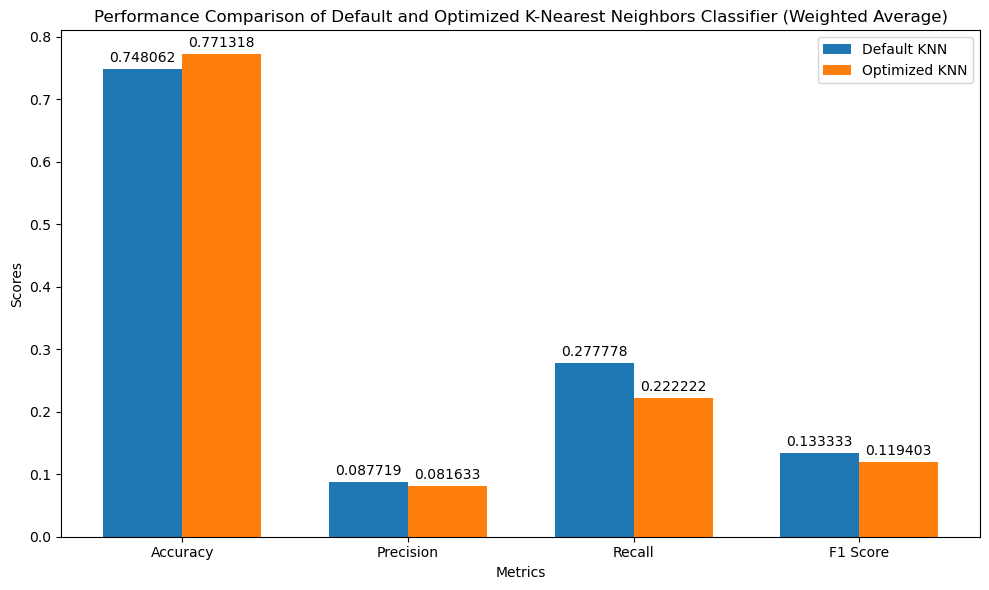

In [81]:
plot_model_comparison(y_vald, y_knn_default_model_pred_val, y_knn_best_pred_val, "K-Nearest Neighbors Classifier", "KNN")

#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description:

In [82]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluate a model using multiple metrics (weighted and macro)
    """
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted'),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted'),
        'Weighted F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro F1 Score': f1_score(y_true, y_pred, average='macro')
    }
    return metrics

In [83]:
def compare_models(y_true, model1_pred, model2_pred, model3_pred, 
                   model1_name, model2_name, model3_name):
    """
    Compare three models using various metrics
    """
    # Calculate metrics for each model
    metrics1 = evaluate_model(y_true, model1_pred, model1_name)
    metrics2 = evaluate_model(y_true, model2_pred, model2_name)
    metrics3 = evaluate_model(y_true, model3_pred, model3_name)
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame([metrics1, metrics2, metrics3])

    cm_model1 = confusion_matrix(y_true, model1_pred)
    cm_model2 = confusion_matrix(y_true, model2_pred)
    cm_model3 = confusion_matrix(y_true, model3_pred)

    fig, axes = plt.subplots(1, 3, figsize=(14, 4))

    # Confusion matrix for model 1
    sns.heatmap(cm_model1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - Optimized ' + model1_name)
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')
    
    # Confusion matrix for model 2
    sns.heatmap(cm_model2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - Optimized ' + model2_name)
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    # Confusion matrix for model 3
    sns.heatmap(cm_model3, annot=True, fmt='d', cmap='Blues', ax=axes[2])
    axes[2].set_title(f'Confusion Matrix - Optimized ' + model3_name)
    axes[2].set_xlabel('Predicted Label')
    axes[2].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()
    
    # Plot comparison bar chart - Accuracy, Weighted Precision, Weighted Recall, Weighted F1 Score
    metrics_to_plot = ['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score']
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics_to_plot))
    width = 0.25
    
    bars1 = plt.bar(x - width, comparison_df[metrics_to_plot].iloc[0], width, label=model1_name)
    bars2 = plt.bar(x, comparison_df[metrics_to_plot].iloc[1], width, label=model2_name)
    bars3 = plt.bar(x + width, comparison_df[metrics_to_plot].iloc[2], width, label=model3_name)

    # Annotate bars with their values
    for bar in bars1:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars2:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars3:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Model Comparison (Weighted Average)')
    plt.xticks(x, metrics_to_plot)
    plt.legend()
    plt.show()

    # Plot comparison bar chart - Accuracy, Macro Precision, Macro Recall, Macro F1 Score
    metrics_to_plot = ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1 Score']
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics_to_plot))
    width = 0.25
    
    bars1 = plt.bar(x - width, comparison_df[metrics_to_plot].iloc[0], width, label=model1_name)
    bars2 = plt.bar(x, comparison_df[metrics_to_plot].iloc[1], width, label=model2_name)
    bars3 = plt.bar(x + width, comparison_df[metrics_to_plot].iloc[2], width, label=model3_name)

    # Annotate bars with their values
    for bar in bars1:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars2:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars3:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Model Comparison (Macro Average)')
    plt.xticks(x, metrics_to_plot)
    plt.legend()
    plt.show()
    
    # Print detailed classification reports
    print(f"\nClassification Report for {model1_name}:")
    print(classification_report(y_true, model1_pred))
    print(f"\nClassification Report for {model2_name}:")
    print(classification_report(y_true, model2_pred))
    print(f"\nClassification Report for {model3_name}:")
    print(classification_report(y_true, model3_pred))
    
    return comparison_df

##### Support Vector Machine (SVM)

In [84]:
y_pred_svm = svm_best_model.predict(X_test)

##### Decision Tree Classifier (DTC)

In [85]:
y_pred_dtc = dtc_best_model.predict(X_test)

##### K-Nearest Neighbour (KNN)

In [86]:
y_pred_knn = knn_best_model.predict(X_test)

#### Model Comparison

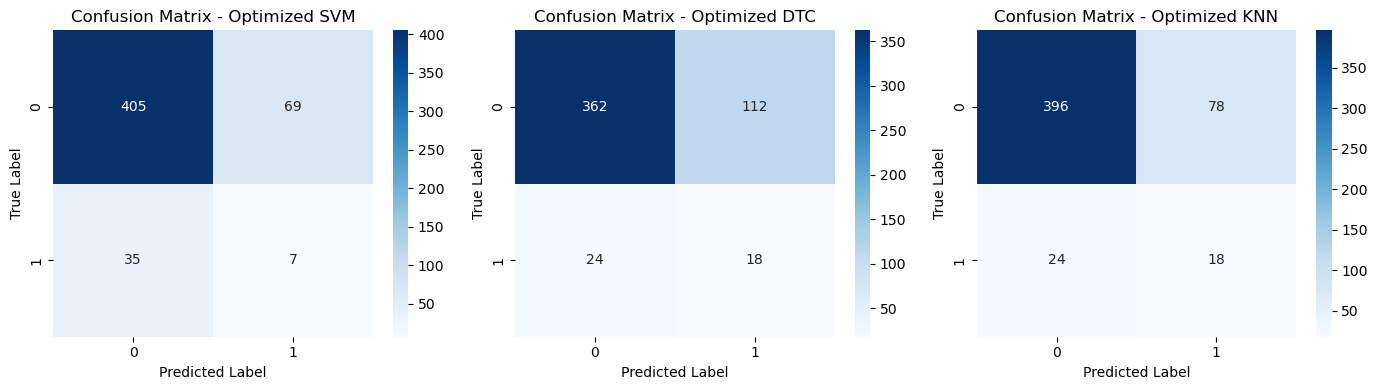

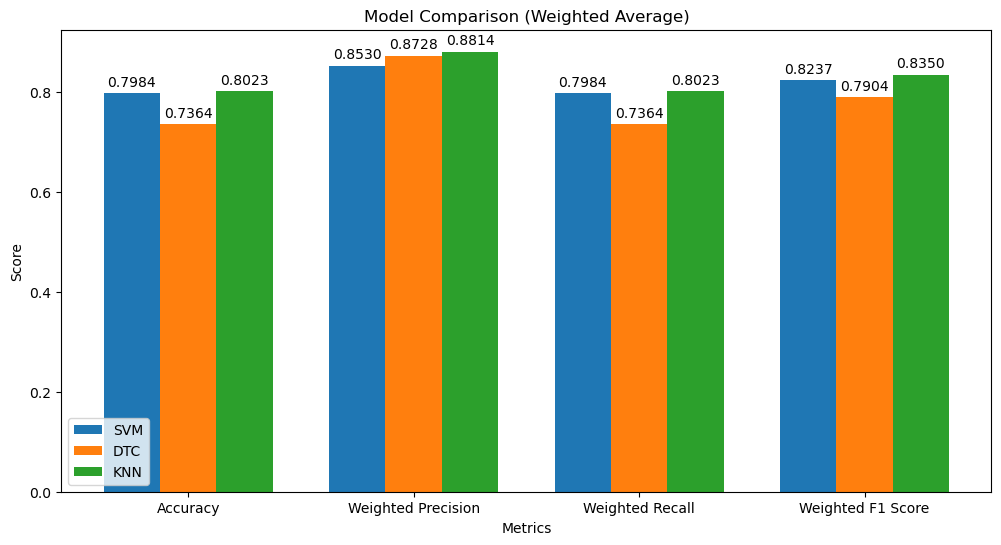

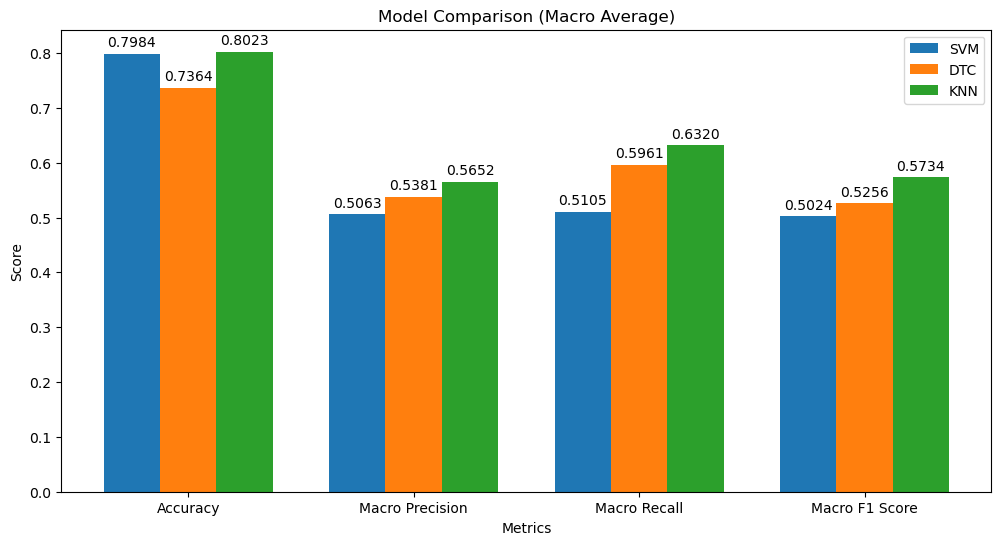


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       474
           1       0.09      0.17      0.12        42

    accuracy                           0.80       516
   macro avg       0.51      0.51      0.50       516
weighted avg       0.85      0.80      0.82       516


Classification Report for DTC:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       474
           1       0.14      0.43      0.21        42

    accuracy                           0.74       516
   macro avg       0.54      0.60      0.53       516
weighted avg       0.87      0.74      0.79       516


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       474
           1       0.19      0.43      0.26        42

    accuracy                           0.80       516
   macro avg       0.57      0.6

In [87]:
results = compare_models(
    y_test,
    y_pred_svm,
    y_pred_dtc,
    y_pred_knn,
    model1_name="SVM",
    model2_name="DTC",
    model3_name="KNN"
    )

In [88]:
# Print detailed results
print("\nDetailed Model Comparison:")
print(results.to_string(index=False))


Detailed Model Comparison:
Model  Accuracy  Weighted Precision  Weighted Recall  Weighted F1 Score  Macro Precision  Macro Recall  Macro F1 Score
  SVM  0.798450            0.853031         0.798450           0.823738         0.506280      0.510549        0.502429
  DTC  0.736434            0.872759         0.736434           0.790373         0.538143      0.596142        0.525581
  KNN  0.802326            0.881375         0.802326           0.835031         0.565179      0.632007        0.573388


Conclusion:
